In [ ]:
!pip install pydantic-settings
!pip install pandas-profiling
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install ydata-profiling
!pip install hvplot

In [111]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [9]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)


for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./accepted_2007_to_2018Q4.csv.gz
./Fintech_Project.ipynb
./rejected_2007_to_2018Q4.csv.gz
./accepted_2007_to_2018q4.csv\accepted_2007_to_2018Q4.csv
./rejected_2007_to_2018q4.csv\rejected_2007_to_2018Q4.csv


In [10]:
def countplot(indipendent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(loans[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

In [11]:
#loansr is a raw dataset containing 2 million of rows
loan = pd.read_csv('./accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True)

C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\2223284841.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('./accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True)


In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [13]:
# Getting Idea about the dataset
print("The shape of the dataset is :- ", loan.shape)
print("The columns in the dataset are :- ", loan.columns)

The shape of the dataset is :-  (2260701, 151)
The columns in the dataset are :-  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)


In [14]:
loans = loan[['loan_amnt', 'term','int_rate', 'sub_grade','emp_title',
                  'emp_length','home_ownership', 'annual_inc', 'loan_status', 'addr_state',
                  'dti','mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl']]

In [15]:
print("The first five rows of the dataset")
loans.head()

The first five rows of the dataset


loan_amnt        term  int_rate sub_grade                    emp_title  \
0     3600.0   36 months     13.99        C4                      leadman   
1    24700.0   36 months     11.99        C1                     Engineer   
2    20000.0   60 months     10.78        B4                 truck driver   
3    35000.0   60 months     14.85        C5  Information Systems Officer   
4    10400.0   60 months     22.45        F1          Contract Specialist   

  emp_length home_ownership  annual_inc loan_status addr_state    dti  \
0  10+ years       MORTGAGE     55000.0  Fully Paid         PA   5.91   
1  10+ years       MORTGAGE     65000.0  Fully Paid         SD  16.06   
2  10+ years       MORTGAGE     63000.0  Fully Paid         IL  10.78   
3  10+ years       MORTGAGE    110000.0     Current         NJ  17.06   
4    3 years       MORTGAGE    104433.0  Fully Paid         PA  25.37   

   mths_since_recent_inq  revol_util  bc_open_to_buy  bc_util  num_op_rev_tl  
0                    4.0        29.7          1506.0     37.2            4.0  
1                    0.0        19.2         57830.0     27.1           20.0  
2                   10.0        56.2          2737.0     55.9            4.0  
3                    NaN        11.6         54962.0     12.1           10.0  
4                    1.0        64.5          4567.0     77.5            7.0

In [16]:
# The below option will set the float format to 2 decimal places for the entire notebook
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [17]:
# The statistical summary of the dataset
loans.describe()

loan_amnt  int_rate  annual_inc     dti  mths_since_recent_inq  \
count    2260668   2260668     2260664 2258957                1965233   
mean       15047        13       77992      19                      7   
std         9190         5      112696      14                      6   
min          500         5           0      -1                      0   
25%         8000         9       46000      12                      2   
50%        12900        13       65000      18                      5   
75%        20000        16       93000      24                     11   
max        40000        31   110000000     999                     25   

       revol_util  bc_open_to_buy  bc_util  num_op_rev_tl  
count     2258866         2185733  2184597        2190392  
mean           50           11394       58              8  
std            25           16600       29              5  
min             0               0        0              0  
25%            32            1722       35              5  
50%            50            5442       60              7  
75%            69           14187       83             10  
max           892          711140      340             91

In [18]:
# The below line will sum the number of missing values in each column of the dataset
loans.isnull().sum()

loan_amnt                    33
term                         33
int_rate                     33
sub_grade                    33
emp_title                167002
emp_length               146940
home_ownership               33
annual_inc                   37
loan_status                  33
addr_state                   33
dti                        1744
mths_since_recent_inq    295468
revol_util                 1835
bc_open_to_buy            74968
bc_util                   76104
num_op_rev_tl             70309
dtype: int64

In [19]:
# Note that the %_empty column is the Percentage of missing values in each column and is rounded off to the nearest integer

total_Empty = pd.DataFrame({'total_Empty': loans.isnull().sum(), '%_empty': (loans.isnull().sum()/2260701)*100})
total_Empty

total_Empty  %_empty
loan_amnt                       33        0
term                            33        0
int_rate                        33        0
sub_grade                       33        0
emp_title                   167002        7
emp_length                  146940        6
home_ownership                  33        0
annual_inc                      37        0
loan_status                     33        0
addr_state                      33        0
dti                           1744        0
mths_since_recent_inq       295468       13
revol_util                    1835        0
bc_open_to_buy               74968        3
bc_util                      76104        3
num_op_rev_tl                70309        3

In [20]:
loans = loans.dropna()
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787734 entries, 0 to 2260698
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   loan_amnt              float64
 1   term                   object 
 2   int_rate               float64
 3   sub_grade              object 
 4   emp_title              object 
 5   emp_length             object 
 6   home_ownership         object 
 7   annual_inc             float64
 8   loan_status            object 
 9   addr_state             object 
 10  dti                    float64
 11  mths_since_recent_inq  float64
 12  revol_util             float64
 13  bc_open_to_buy         float64
 14  bc_util                float64
 15  num_op_rev_tl          float64
dtypes: float64(9), object(7)
memory usage: 231.9+ MB


In [21]:
# Now check the missing values in the dataset
empty_data = pd.DataFrame({'total_empty': loans.isnull().sum()})
empty_data

total_empty
loan_amnt                        0
term                             0
int_rate                         0
sub_grade                        0
emp_title                        0
emp_length                       0
home_ownership                   0
annual_inc                       0
loan_status                      0
addr_state                       0
dti                              0
mths_since_recent_inq            0
revol_util                       0
bc_open_to_buy                   0
bc_util                          0
num_op_rev_tl                    0

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'num_op_rev_tl'}>]], dtype=object)

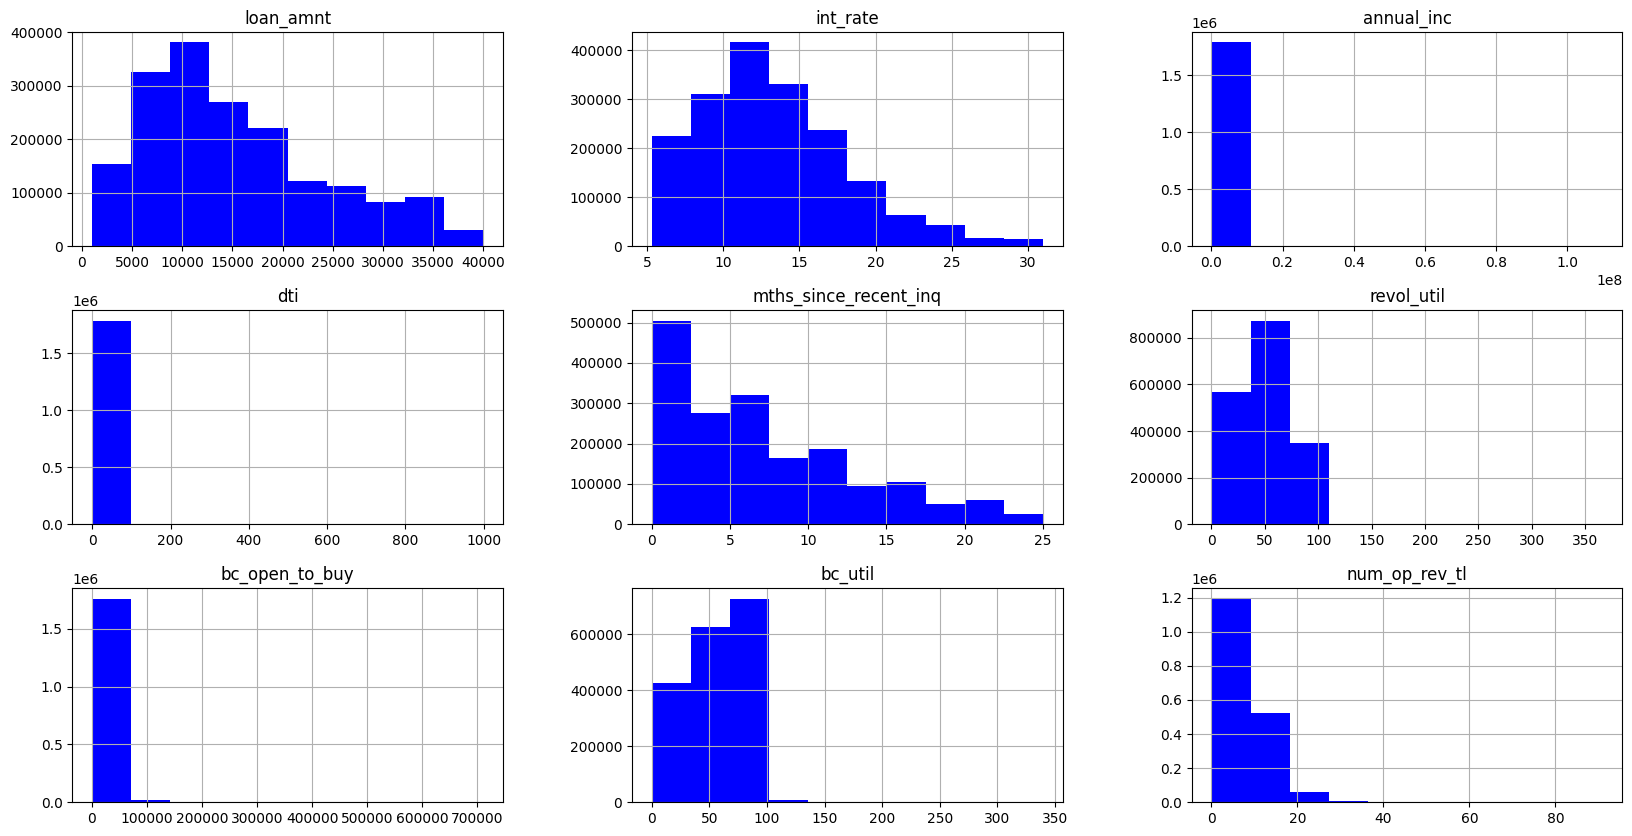

In [22]:
loans.hist(bins = 10, figsize = (20,10), color = 'b')

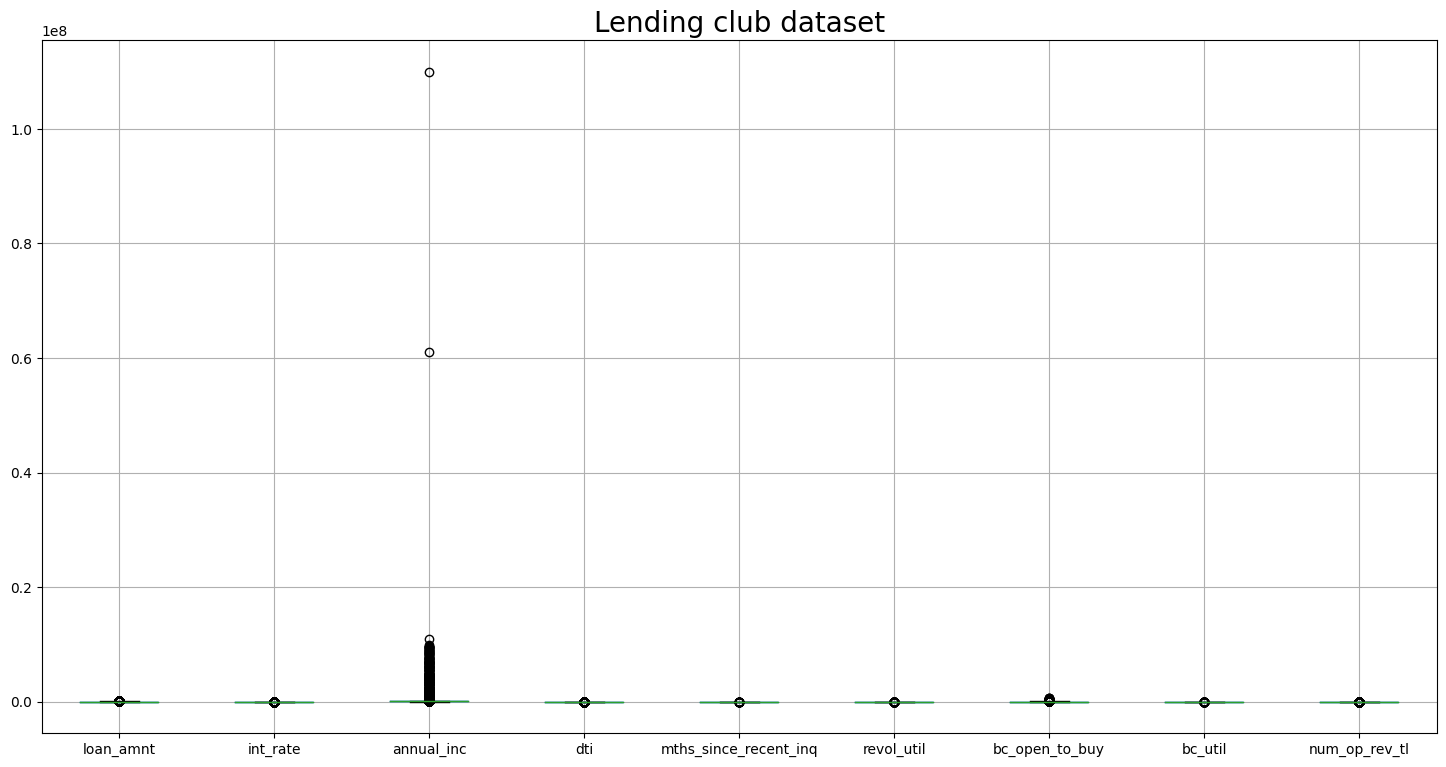

In [23]:
loan_cols = ['loan_amnt', 'term','int_rate', 'sub_grade',
                  'emp_length','home_ownership', 'annual_inc', 'loan_status', 'addr_state',
                  'dti','mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl' ]
plt.figure(figsize=(18,9))
loans[loan_cols].boxplot()
plt.title("Lending club dataset", fontsize=20)
plt.show()

In [24]:
# We see that annual_inc has some outliers and we need to remove them

# So we calculate the statistical summary of the annual_inc column 
loans.annual_inc.describe()

count     1787734
mean        81316
std        121941
min             0
25%         50000
50%         69000
75%         96000
max     110000000
Name: annual_inc, dtype: float64

In [25]:
# We check all the unique values in the annual_inc column and sort them in order to find the outliers
sorted(loans.annual_inc.unique())

[0.0,
 20.0,
 25.0,
 32.0,
 33.0,
 36.0,
 60.0,
 70.0,
 100.0,
 118.0,
 138.0,
 191.0,
 200.0,
 500.0,
 600.0,
 700.0,
 750.0,
 760.0,
 800.0,
 910.0,
 1000.0,
 1050.0,
 1200.0,
 1300.0,
 1370.0,
 1400.0,
 1500.0,
 1700.0,
 1750.0,
 1800.0,
 1900.0,
 1993.0,
 2000.0,
 2140.0,
 2200.0,
 2300.0,
 2400.0,
 2402.0,
 2436.0,
 2439.0,
 2500.0,
 2600.0,
 2951.0,
 3000.0,
 3003.0,
 3120.0,
 3181.0,
 3200.0,
 3300.0,
 3354.0,
 3400.0,
 3412.0,
 3500.0,
 3545.0,
 3600.0,
 3700.0,
 3800.0,
 4000.0,
 4002.0,
 4100.0,
 4177.0,
 4200.0,
 4300.0,
 4400.0,
 4412.0,
 4500.0,
 4535.0,
 4600.0,
 4695.0,
 4800.0,
 4992.0,
 5000.0,
 5160.0,
 5200.0,
 5235.0,
 5300.0,
 5360.0,
 5400.0,
 5472.0,
 5500.0,
 5538.0,
 5600.0,
 5700.0,
 5971.0,
 6000.0,
 6200.0,
 6240.0,
 6250.0,
 6380.0,
 6400.0,
 6408.0,
 6424.0,
 6500.0,
 6572.0,
 6600.0,
 6800.0,
 7000.0,
 7020.0,
 7050.0,
 7100.0,
 7111.0,
 7156.0,
 7159.4,
 7200.0,
 7240.0,
 7255.0,
 7261.0,
 7300.0,
 7459.64,
 7500.0,
 7560.0,
 7591.0,
 7600.0,
 7605.0,
 7

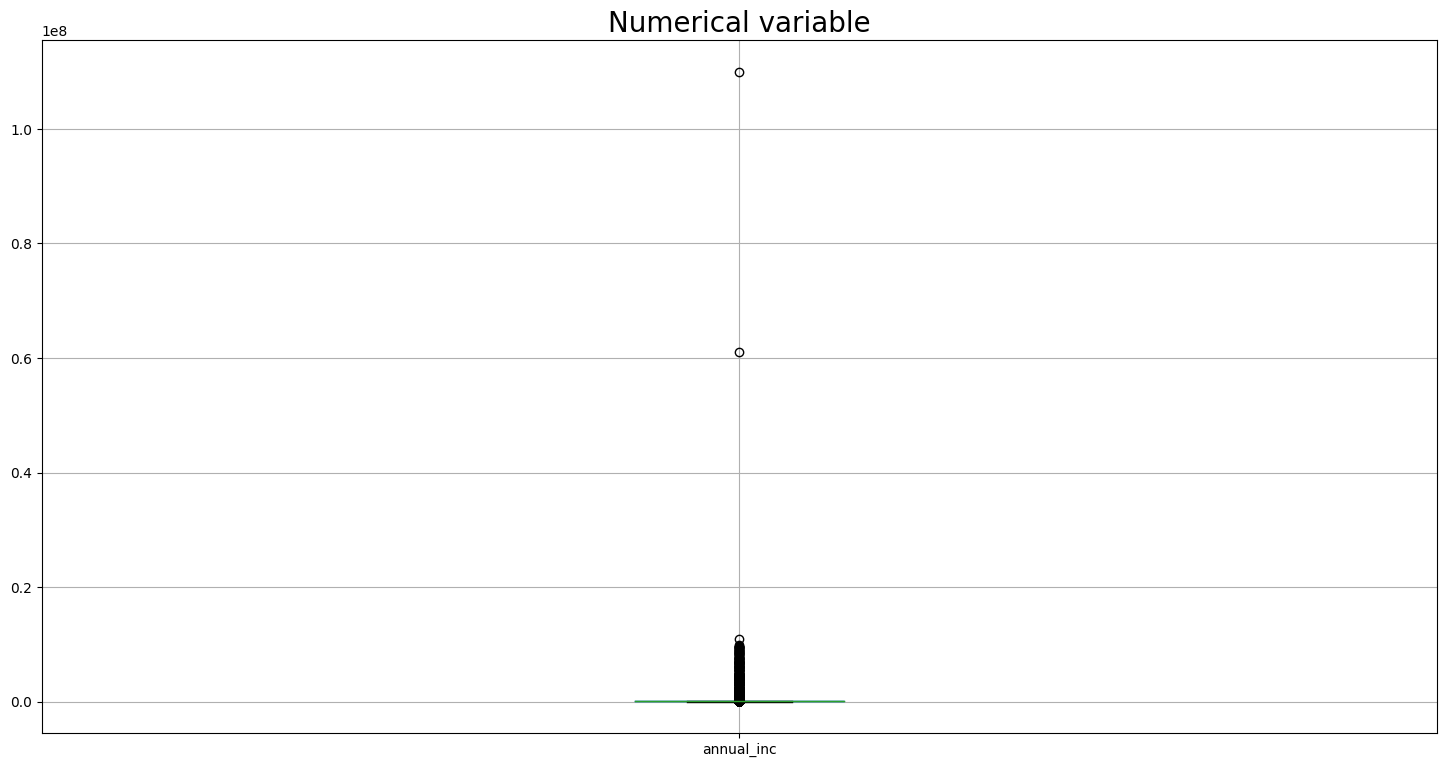

In [26]:
# Box Plot of the column annual_inc to check for outliers

X = ['annual_inc']
plt.figure(figsize=(18,9))
loans[X].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [27]:
# remove outlier "annual income" from the dataset
# We consider the 5th and 95nd percentile as the lower and upper limits for the annual income

q_low = loans["annual_inc"].quantile(0.05)
q_hi  = loans["annual_inc"].quantile(0.95)

loans_old = loans
loans = loans[(loans["annual_inc"] < q_hi) & (loans["annual_inc"] > q_low)]

Text(0.5, 1.0, 'After')

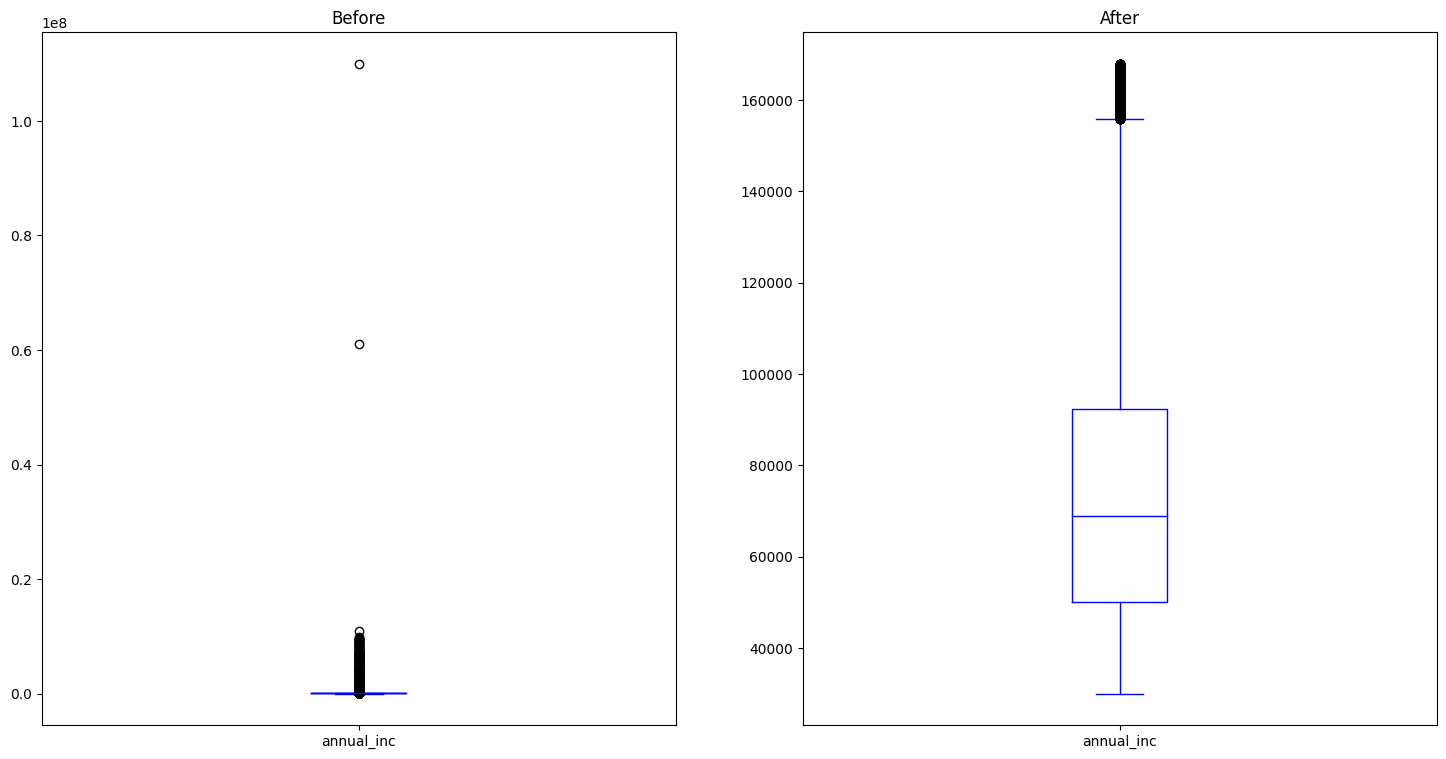

In [28]:
# Plot 2 box plot comparing the annual income before and after removing the outliers

ax = plt.subplot(1, 2, 1)
loans_old['annual_inc'].plot(kind='box', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans['annual_inc'].plot(kind='box', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('After')

Text(0.5, 1.0, 'After')

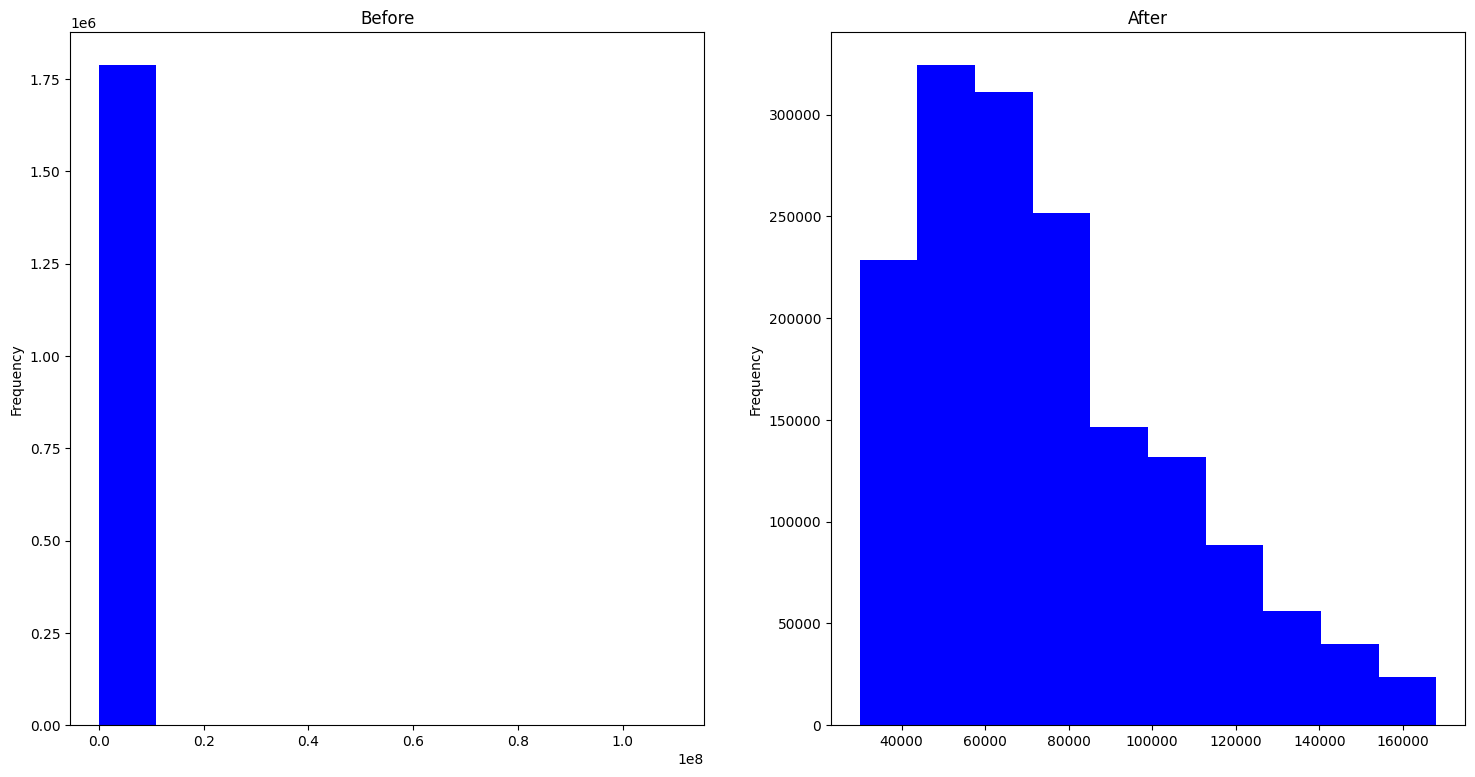

In [29]:
# Comparing the histplots of the annual income before and after removing the outliers

ax = plt.subplot(1, 2, 1)
loans_old['annual_inc'].plot(kind='hist', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans['annual_inc'].plot(kind='hist', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('After')

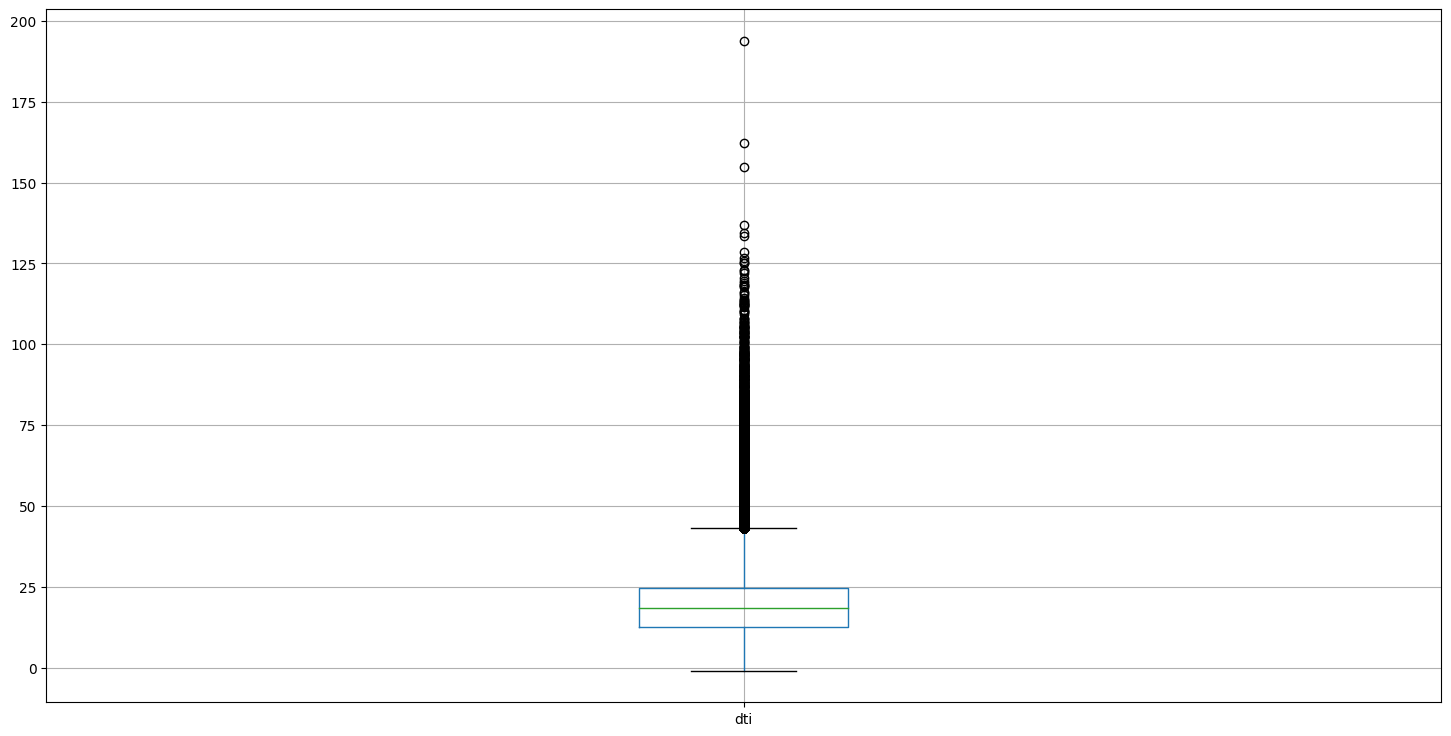

In [30]:
# Box Plot of the column dti to check for outliers (DTI = Debt to Income Ratio)

X = ['dti']
plt.figure(figsize=(18,9))
loans[X].boxplot()
plt.show()

In [31]:
# Most of the conventional banks allow for a DTI ratio of no more than 45 percent. :- https://www.bankrate.com  
loans_old = loans
loans = loans[(loans['dti'] <= 45)]

Text(0.5, 1.0, 'After')

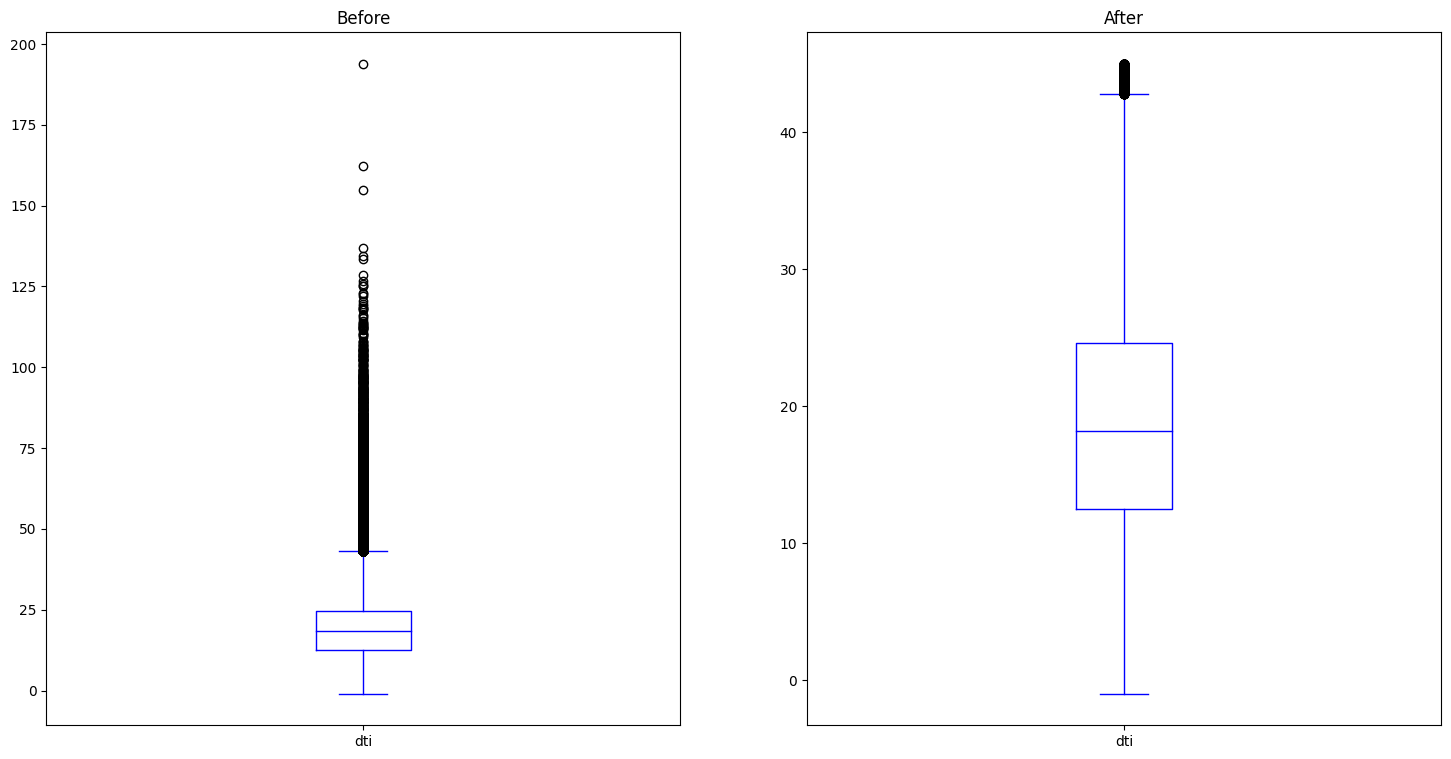

In [32]:
ax = plt.subplot(1, 2, 1)
loans_old['dti'].plot(kind='box', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans['dti'].plot(kind='box', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('After')

Text(0.5, 1.0, 'After')

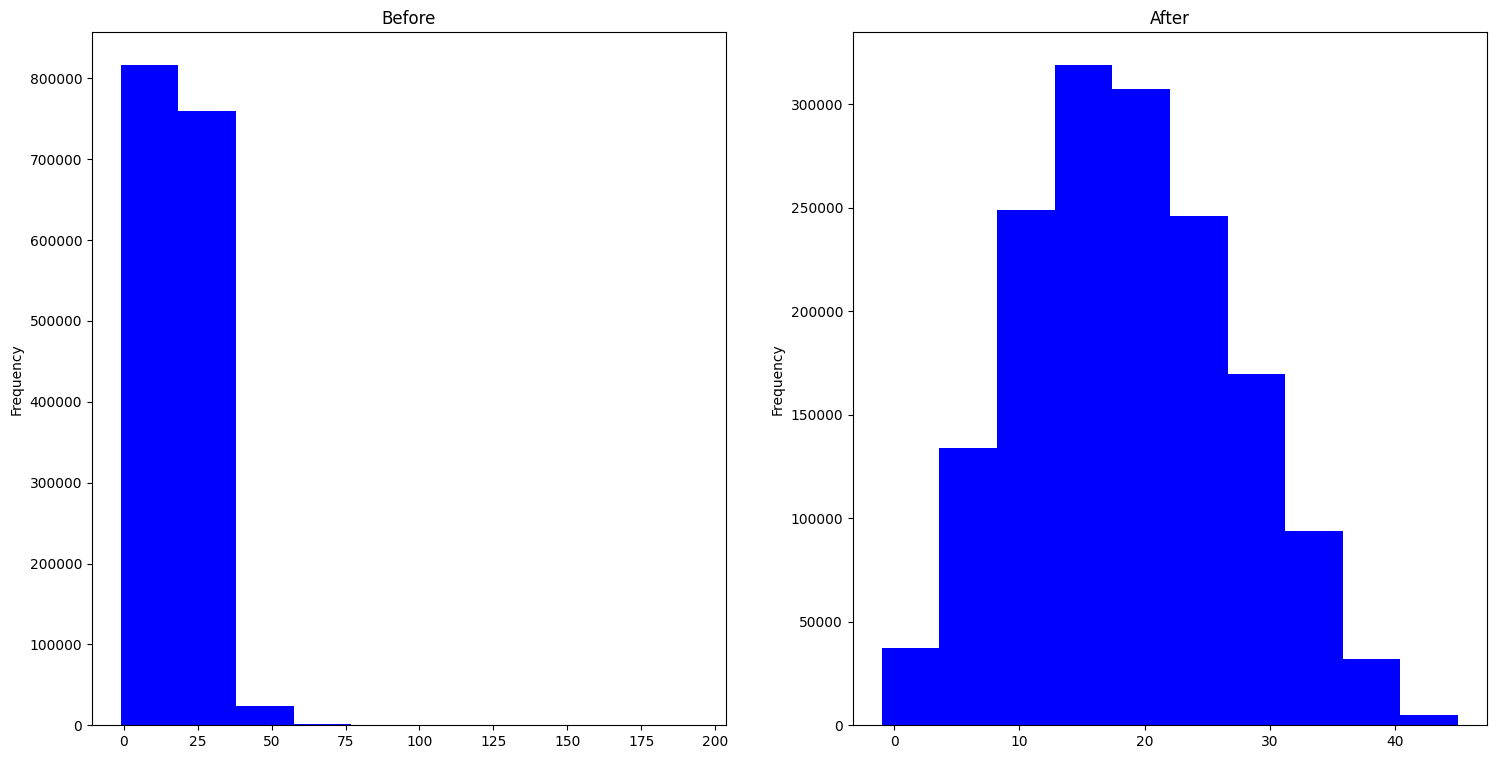

In [33]:
# Comparing the histograms of the dti before and after removing the outliers

ax = plt.subplot(1, 2, 1)
loans_old['dti'].plot(kind='hist', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans['dti'].plot(kind='hist', figsize=(18, 9), color='blue', ax=ax)
ax.set_title('After')

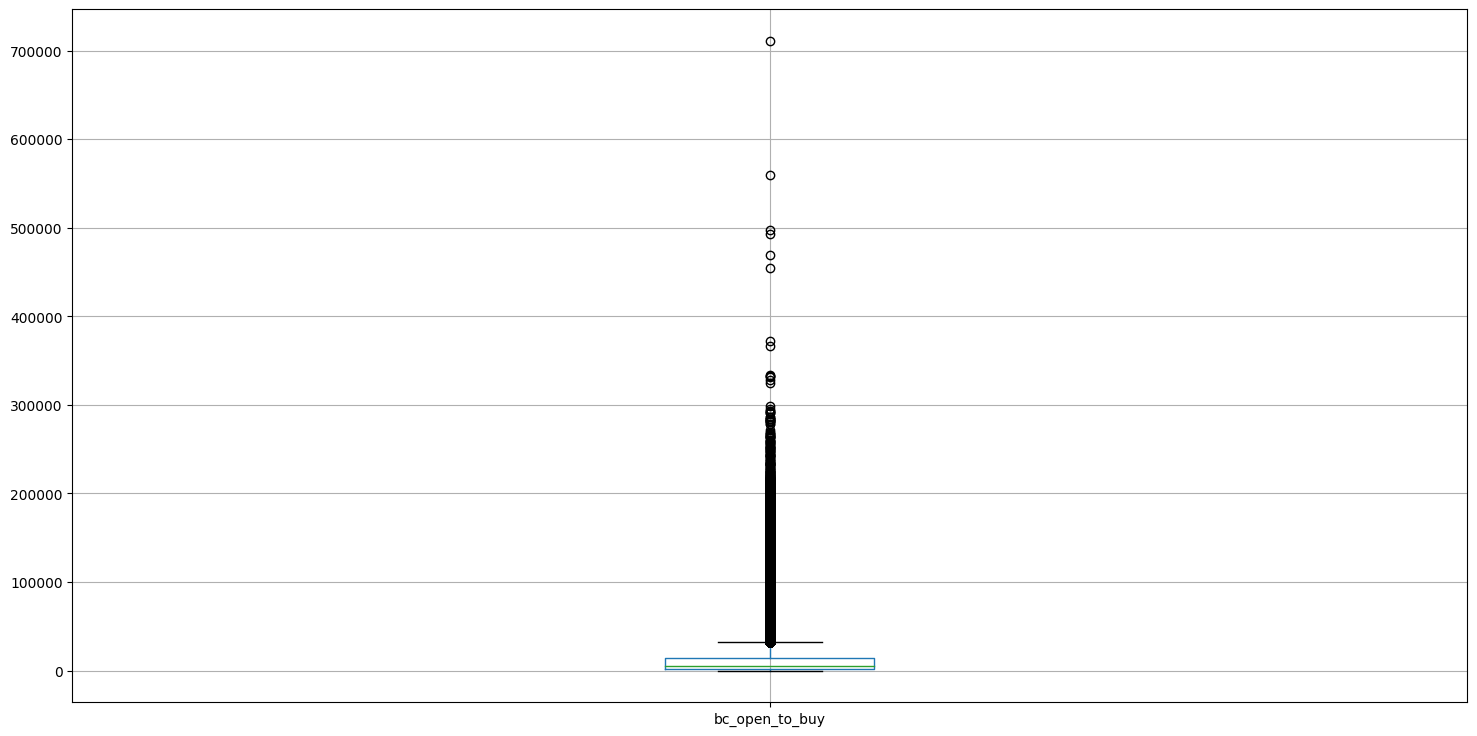

In [34]:
# checking the boxplot of the column bc_open_to_buy to check for outliers

X = ['bc_open_to_buy']
plt.figure(figsize=(18,9))
loans[X].boxplot()
plt.show()

In [35]:
# Removing the last 5% of the data from the bc_open_to_buy column as it may contain outliers

q_hi  = loans['bc_open_to_buy'].quantile(0.95)
loans_old = loans
loans = loans[(loans['bc_open_to_buy'] < q_hi)]

Text(0.5, 1.0, 'After')

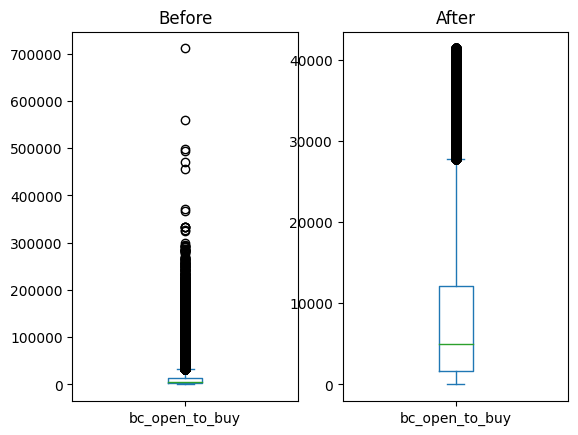

In [36]:
# Comparing the box plot before and after removing the outliers

# Before boxplot must occur on the left and after boxplot must occur on the right

ax = plt.subplot(1, 2, 1)
loans_old['bc_open_to_buy'].plot(kind='box', ax=ax)
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["bc_open_to_buy"].plot(kind='box', ax=ax)
ax.set_title('After')

Text(0.5, 1.0, 'After')

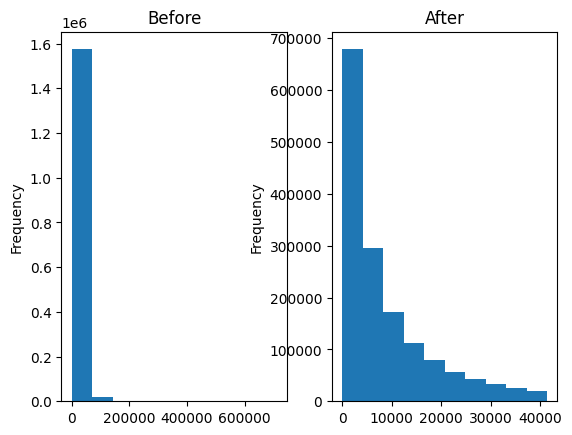

In [37]:
# Comparing the histplot before and after removing the outliers

ax = plt.subplot(1, 2, 1)
loans_old['bc_open_to_buy'].plot(kind='hist', ax=ax)
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["bc_open_to_buy"].plot(kind='hist', ax=ax)
ax.set_title('After')

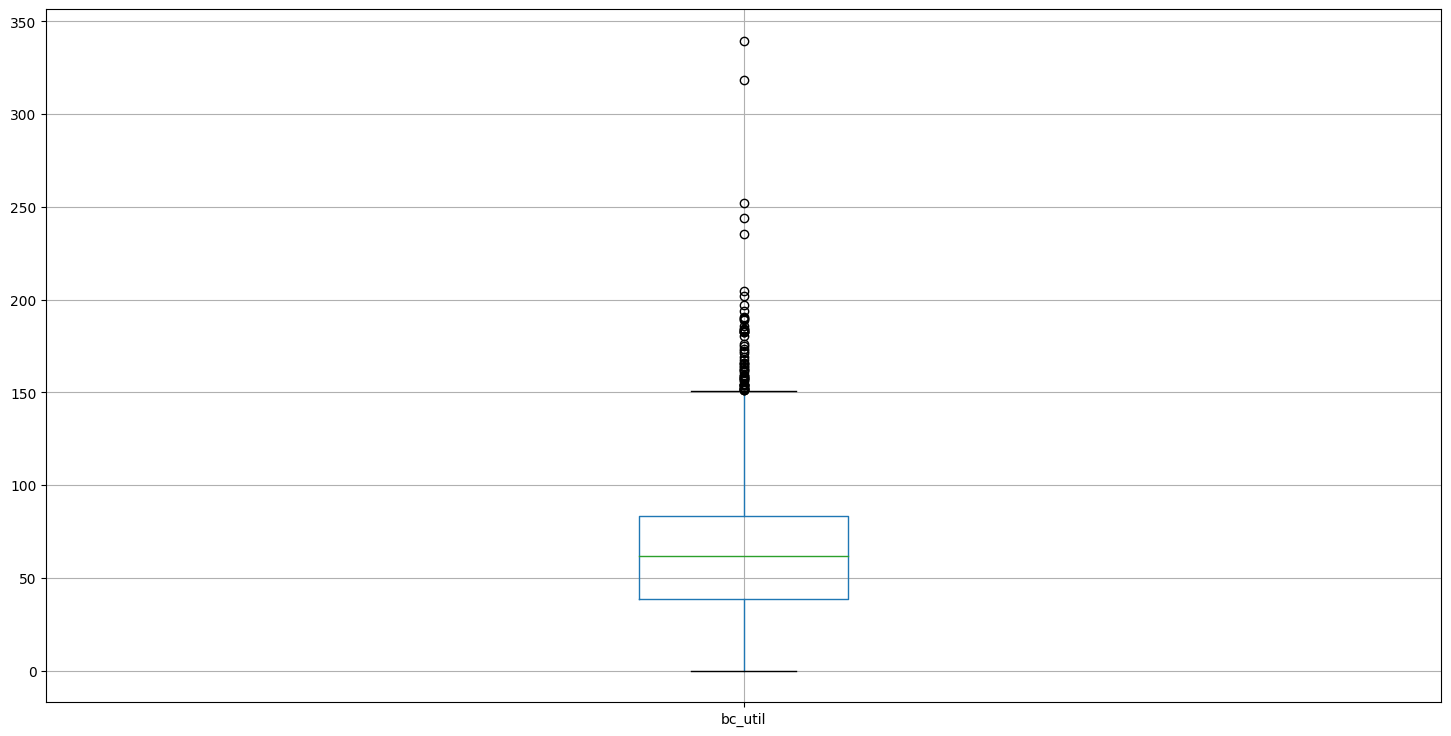

In [38]:
# Checking the box plot of the bc_util column to check for outliers

X = ['bc_util']
plt.figure(figsize=(18,9))
loans[X].boxplot()
plt.show()

In [39]:
# As the bc_utils cant have a value greater than 160, we remove the outliers from the dataset :- source https://www.investopedia.com/terms/b/bc-util.asp

loans_old = loans
loans = loans[(loans['bc_util'] <=160)]

Text(0.5, 1.0, 'After')

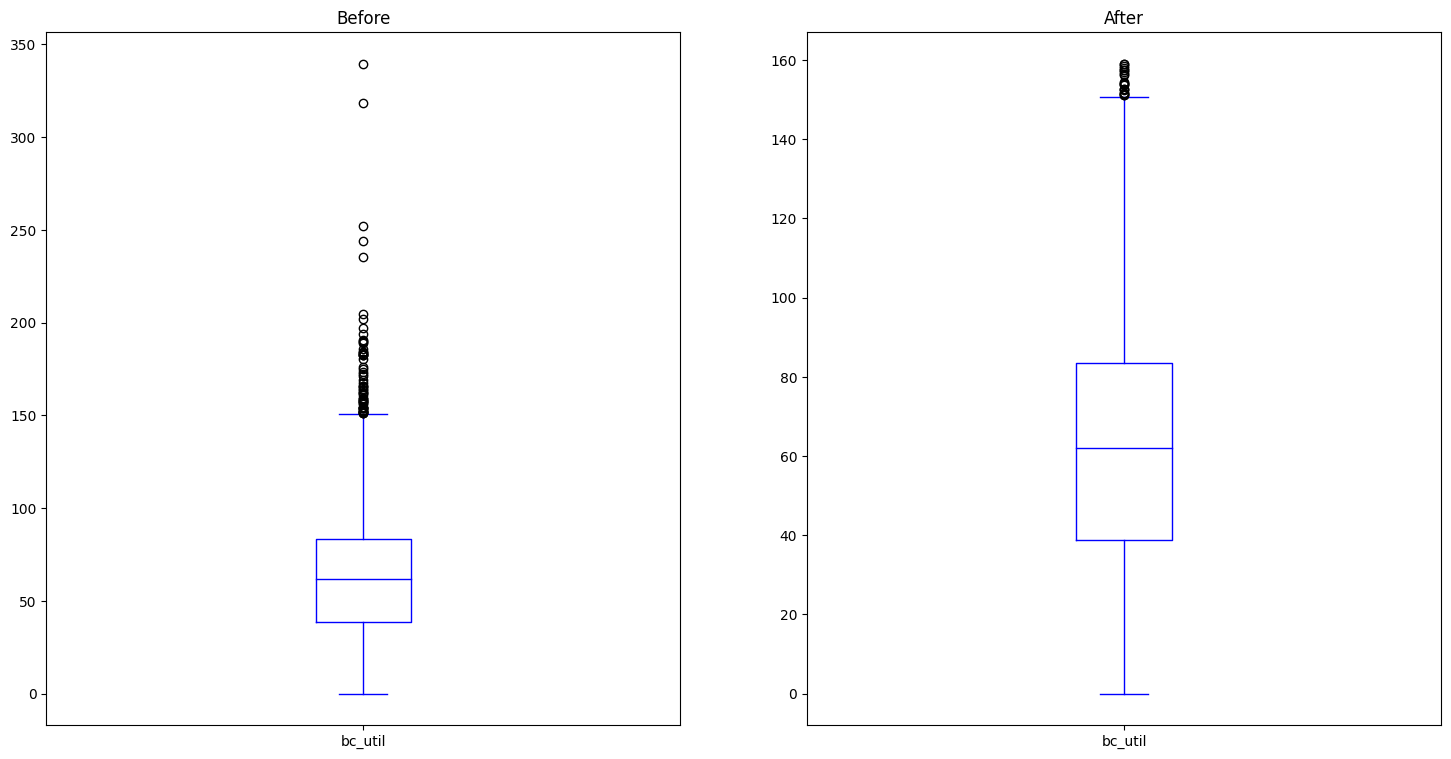

In [40]:
# Comparing the box plot before and after removing the outliers

ax = plt.subplot(1, 2, 1)
loans_old['bc_util'].plot(kind='box', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["bc_util"].plot(kind='box', ax=ax, color="blue", figsize=(18, 9))
ax.set_title('After')

Text(0.5, 1.0, 'After')

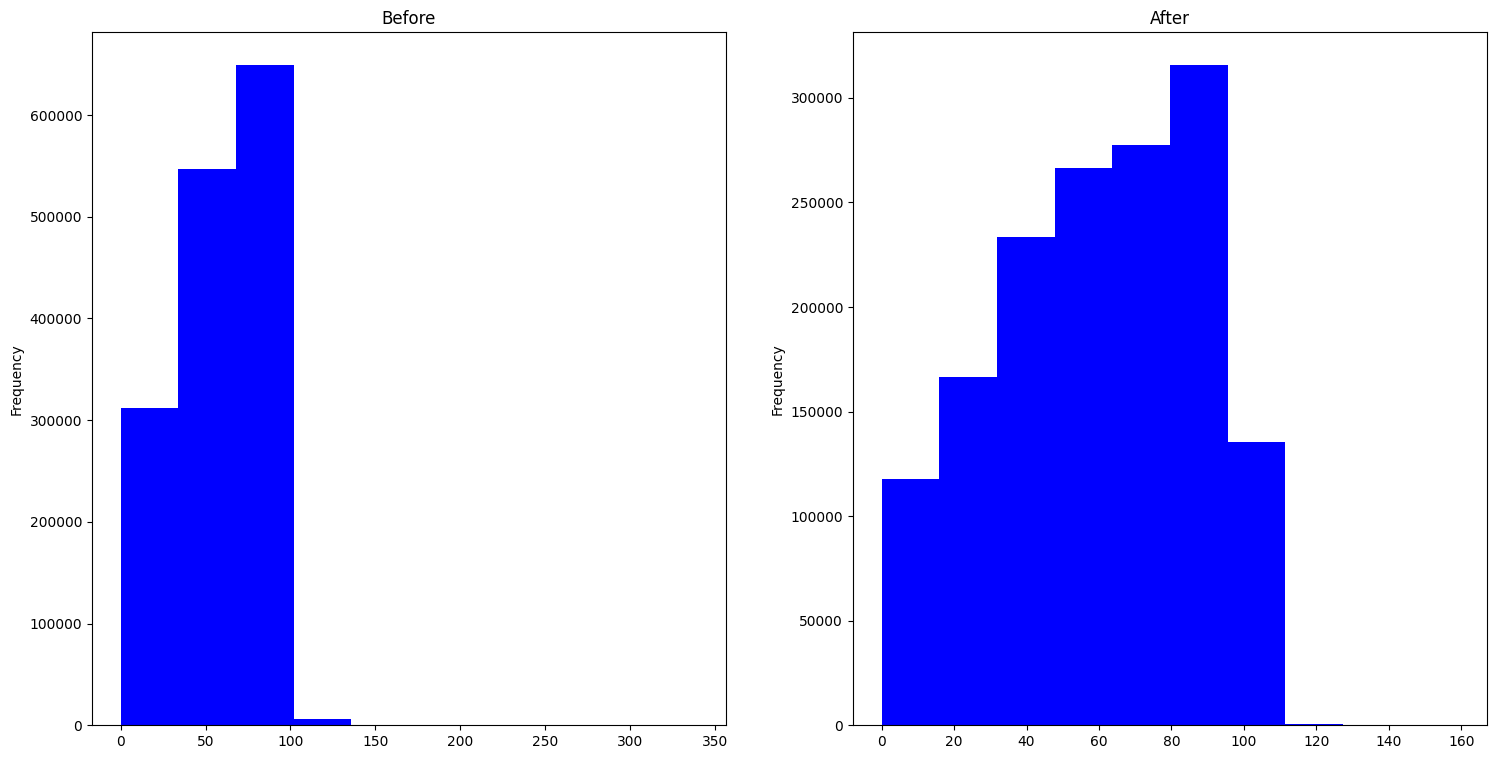

In [41]:
# Comparing the histplot before and after removing the outliers

ax = plt.subplot(1, 2, 1)
loans_old['bc_util'].plot(kind='hist', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["bc_util"].plot(kind='hist', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('After')

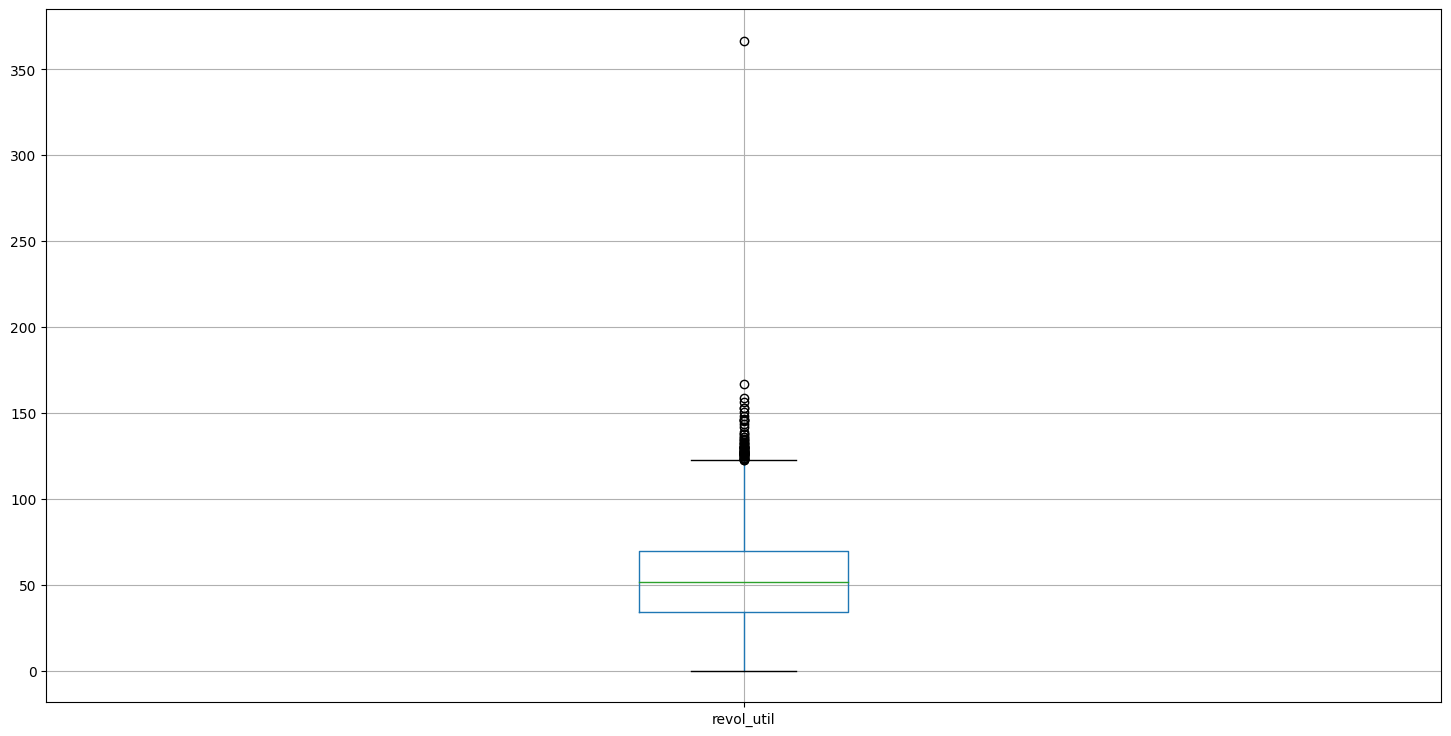

In [42]:
# Box Plot of the column revol_util to check for outliers

X = ['revol_util']
plt.figure(figsize=(18,9))
loans[X].boxplot()
plt.show()

In [43]:
# The revol_util column can't have a value greater than 150, so we remove the outliers from the dataset :- source https://www.investopedia.com/terms/r/revolvingutilization.asp
loans_old = loans
loans = loans[(loans['revol_util'] <=150)]

Text(0.5, 1.0, 'After')

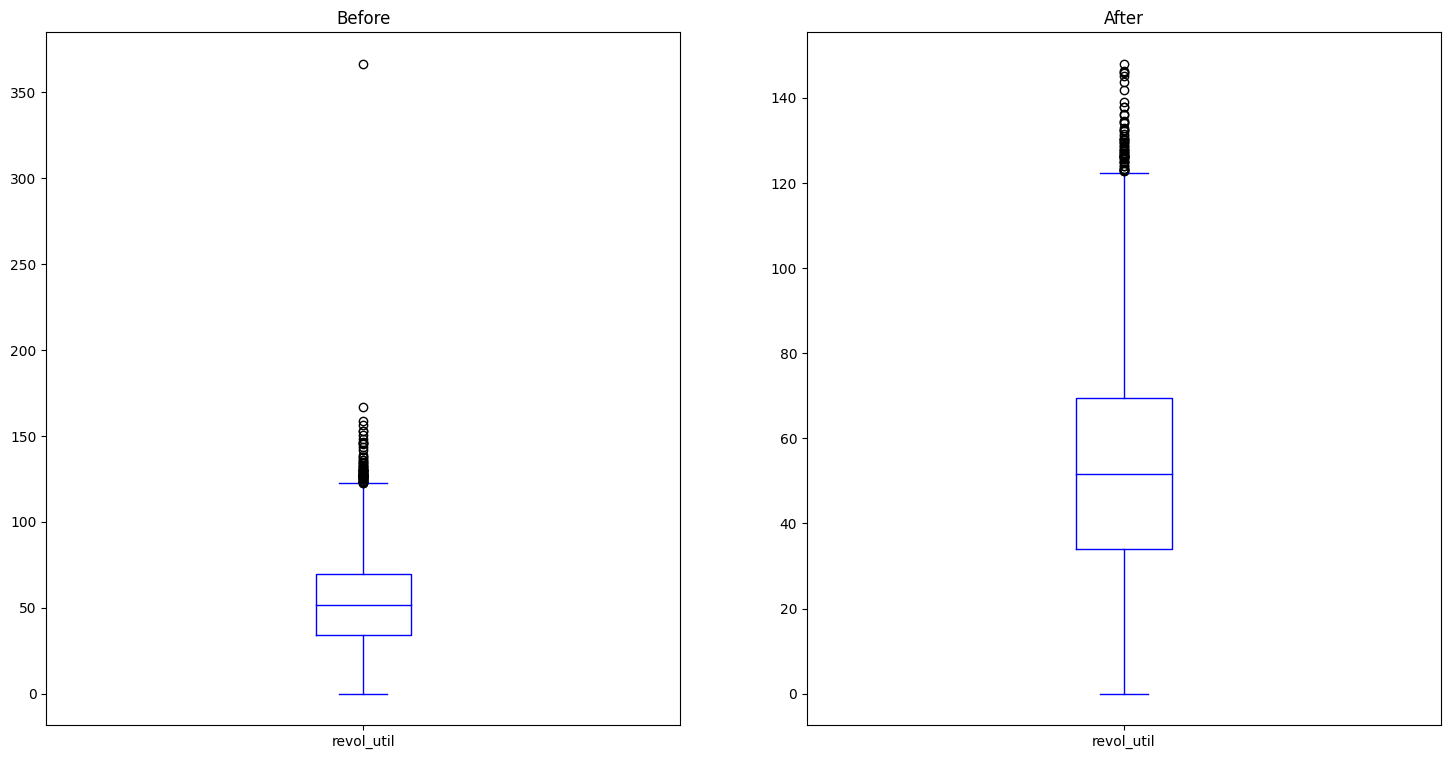

In [44]:
# After removing the outliers now we compare the box plot of the revol_util column

ax = plt.subplot(1, 2, 1)
loans_old['revol_util'].plot(kind='box', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["revol_util"].plot(kind='box', ax=ax, color="blue", figsize=(18, 9))
ax.set_title('After')

Text(0.5, 1.0, 'After')

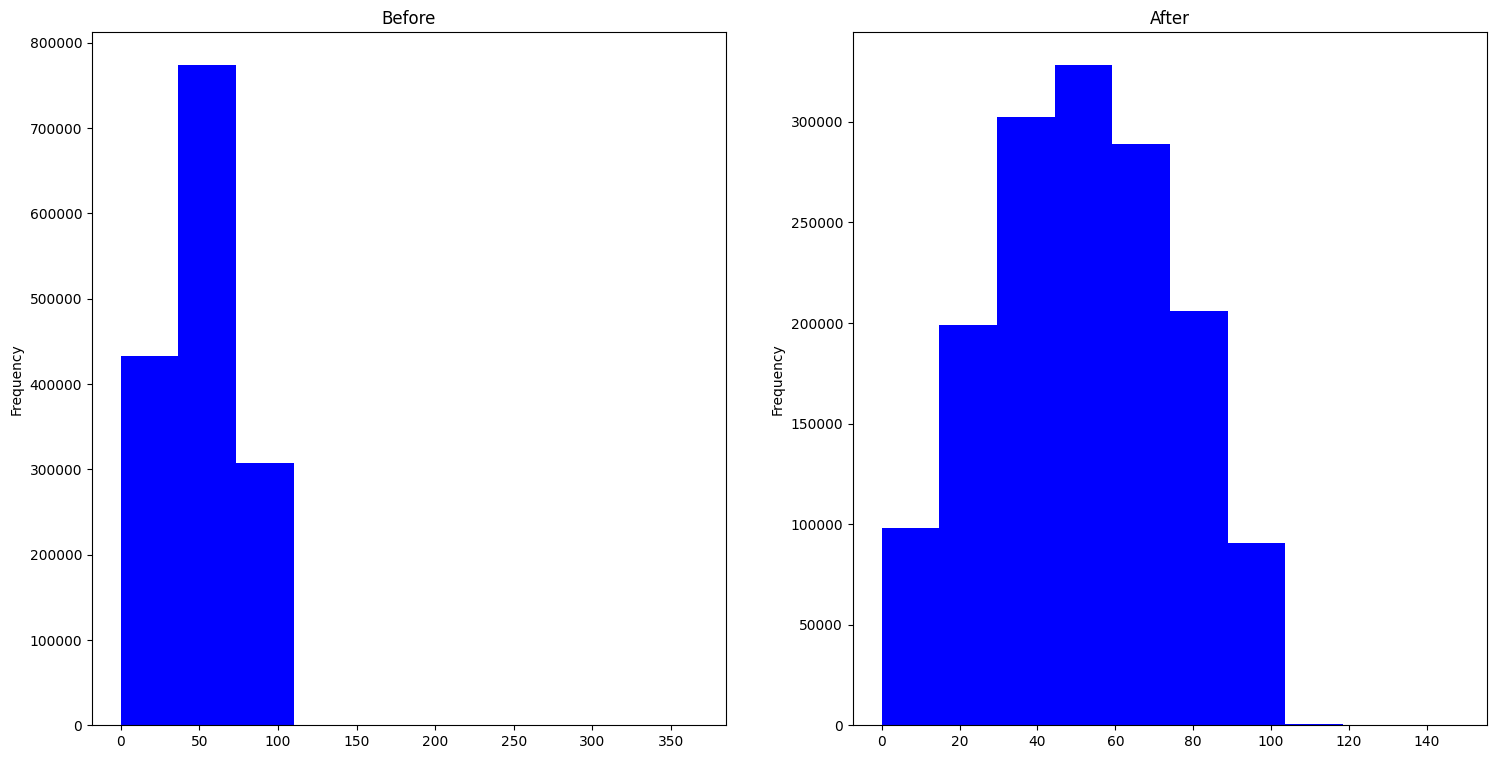

In [45]:
# Now plot the comparison in form of histplot
ax = plt.subplot(1, 2, 1)
loans_old['revol_util'].plot(kind='hist', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["revol_util"].plot(kind='hist', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('After')

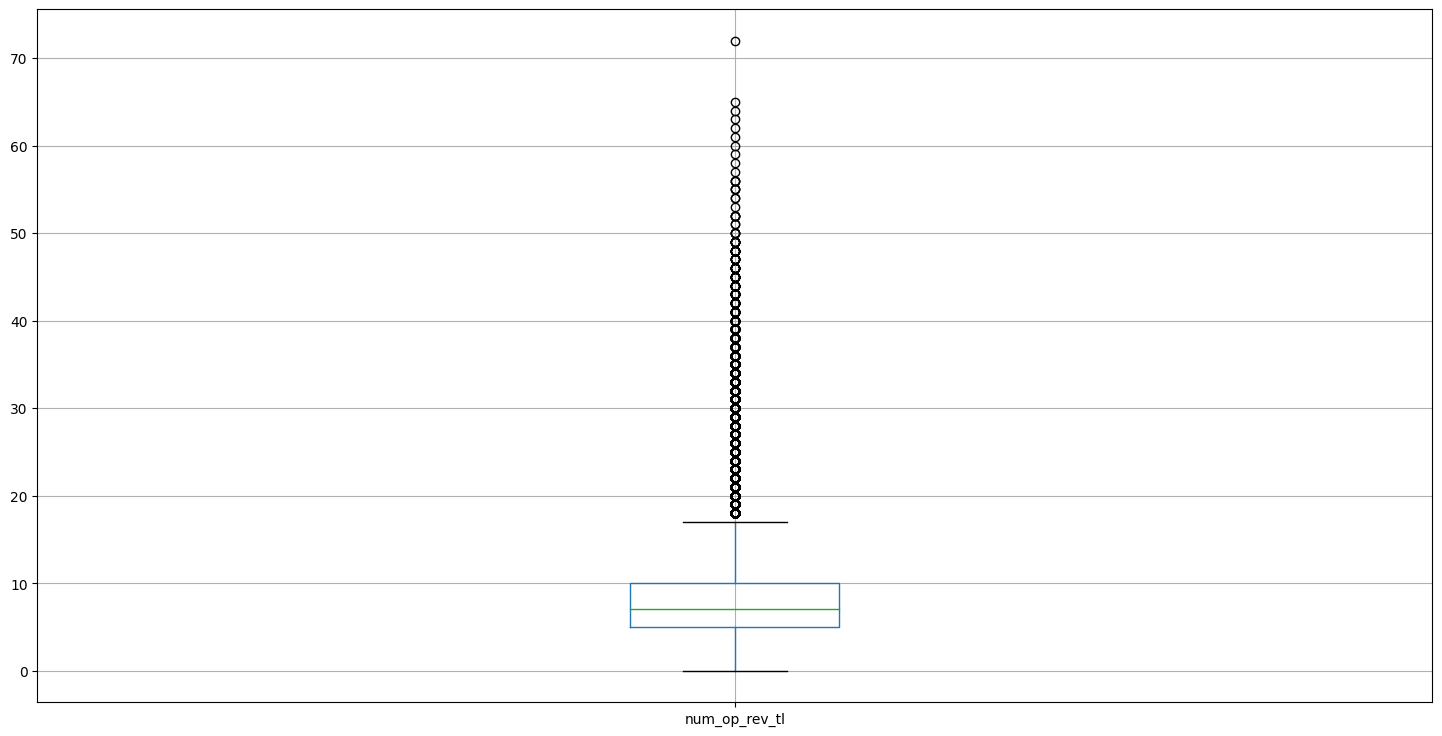

In [46]:
# Now checking for the outliers in the num_op_rev_tl column

X = ['num_op_rev_tl']
plt.figure(figsize=(18,9))
loans[X].boxplot()
plt.show()

In [47]:
# The maximum number of open revolving accounts is 35, so we remove the outliers from the dataset :- source https://www.investopedia.com/terms/b/bc-util.asp 
loans_old = loans
loans = loans[(loans['num_op_rev_tl'] <=35)]

Text(0.5, 1.0, 'After')

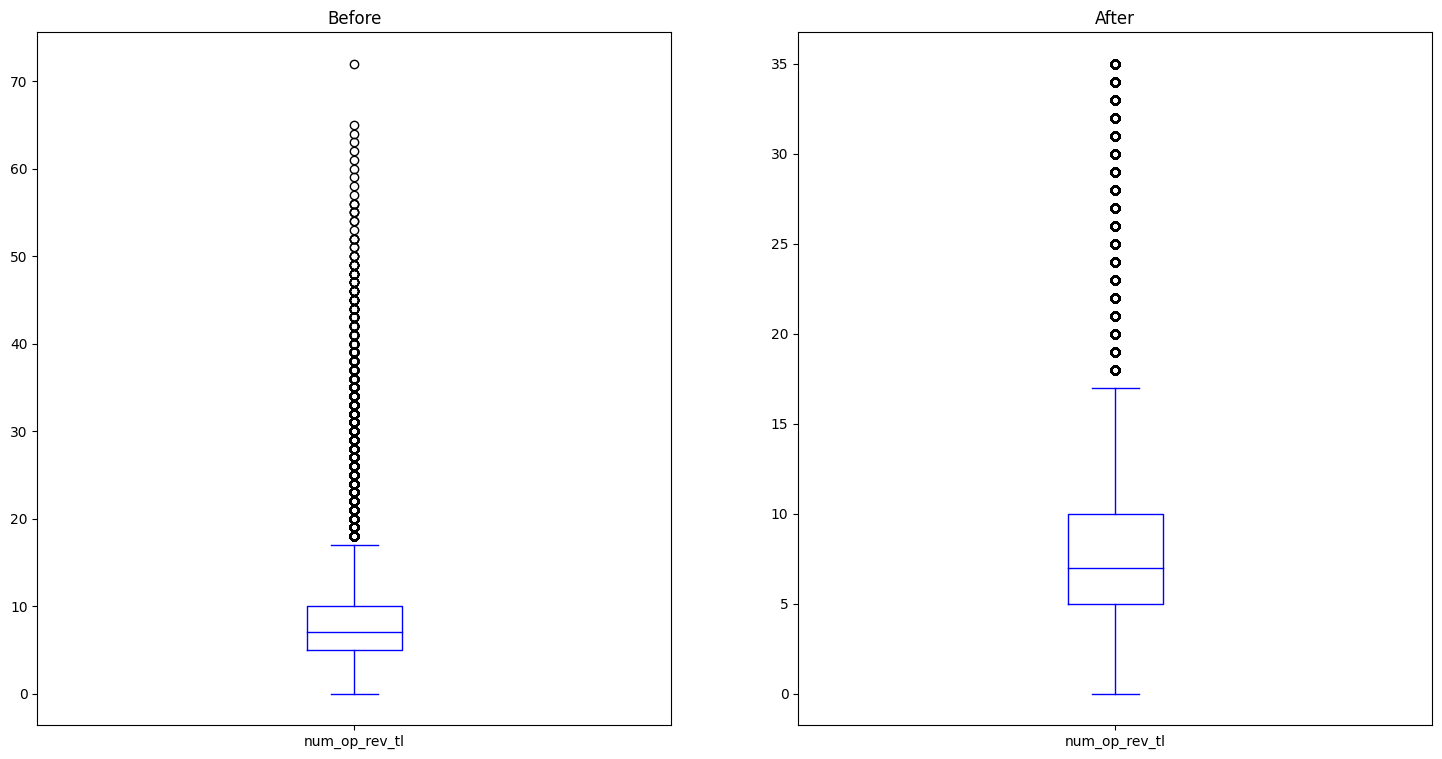

In [48]:
# After removing the outliers now we compare the box plot of the num_op_rev_tl column

ax = plt.subplot(1, 2, 1)
loans_old['num_op_rev_tl'].plot(kind='box', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["num_op_rev_tl"].plot(kind='box', ax=ax, color="blue", figsize=(18, 9))
ax.set_title('After')

Text(0.5, 1.0, 'After')

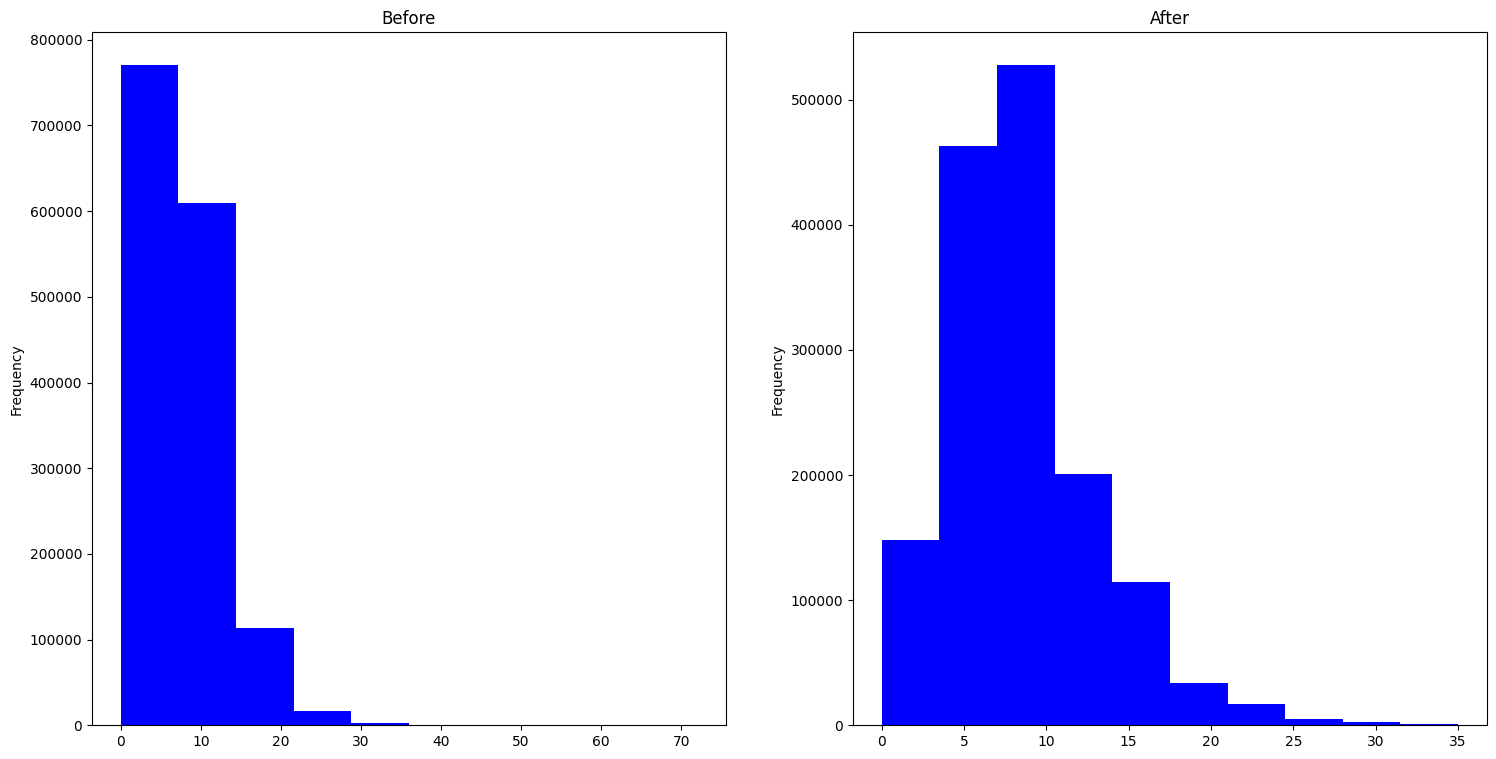

In [49]:
# histogram comparison before and after removing the outliers

ax = plt.subplot(1, 2, 1)
loans_old['num_op_rev_tl'].plot(kind='hist', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('Before')

ax = plt.subplot(1, 2, 2)
loans["num_op_rev_tl"].plot(kind='hist', ax=ax, color='blue', figsize=(18, 9))
ax.set_title('After')

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'num_op_rev_tl'}>]], dtype=object)

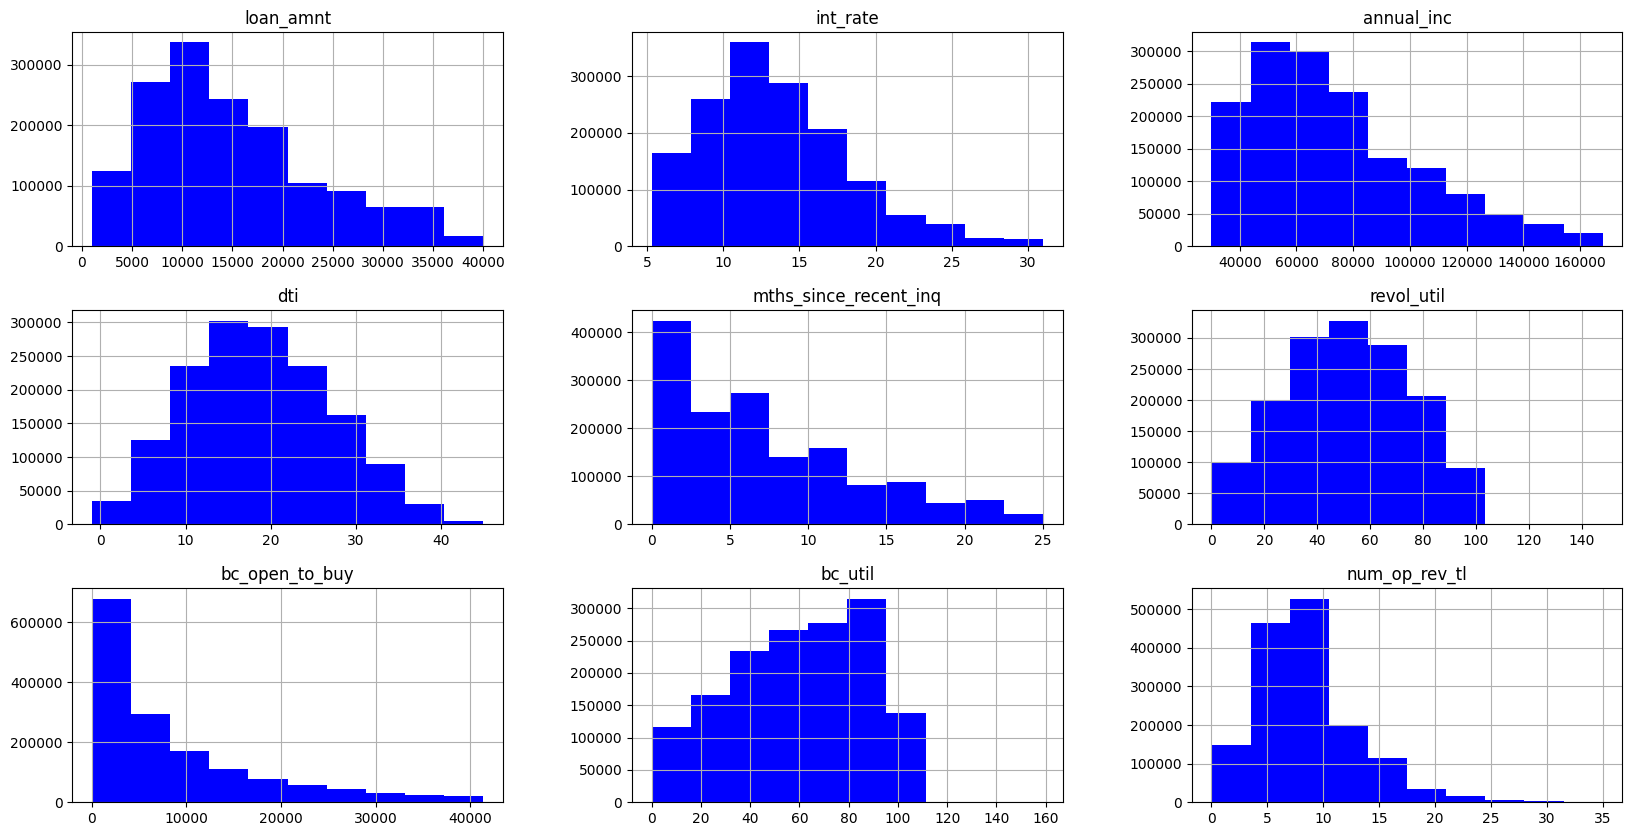

In [50]:
# Finally we check the histograms of the dataset after removing the outliers
loans.hist(bins = 10, figsize = (20,10), color = 'b')

In [58]:
# Profiling the dataset using pandas profiling

from ydata_profiling import ProfileReport  # Import from ydata_profiling
from pydantic_settings import BaseSettings  # Assuming this import is needed

profile = ProfileReport(loans, title='Loans Defaults Prediction', html={'style': {'full_width': True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
# dropping passed columns as they are not needed
loans.drop(["bc_util", "bc_open_to_buy","int_rate"], axis = 1, inplace = True)
loans.head()

C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\787872941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans.drop(["bc_util", "bc_open_to_buy","int_rate"], axis = 1, inplace = True)


loan_amnt        term sub_grade            emp_title emp_length  \
0       3600   36 months        C4              leadman  10+ years   
2      20000   60 months        B4         truck driver  10+ years   
4      10400   60 months        F1  Contract Specialist    3 years   
7      20000   36 months        B1          road driver  10+ years   
8      10000   36 months        A2      SERVICE MANAGER    6 years   

  home_ownership  annual_inc loan_status addr_state  dti  \
0       MORTGAGE       55000  Fully Paid         PA    6   
2       MORTGAGE       63000  Fully Paid         IL   11   
4       MORTGAGE      104433  Fully Paid         PA   25   
7       MORTGAGE       85000  Fully Paid         SC   18   
8           RENT       85000  Fully Paid         PA   13   

   mths_since_recent_inq  revol_util  num_op_rev_tl  
0                      4          30              4  
2                     10          56              4  
4                      1          64              7  
7                      8           6              3  
8                      1          34             13

In [60]:
cleaner_app_type = {"term": {" 36 months": 1.0, " 60 months": 2.0},
                    "sub_grade": {"A1": 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0, 
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
loans = loans.replace(cleaner_app_type)
loans.info()

C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\4210513029.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loans = loans.replace(cleaner_app_type)


<class 'pandas.core.frame.DataFrame'>
Index: 1513218 entries, 0 to 2260698
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   loan_amnt              1513218 non-null  float64
 1   term                   1513218 non-null  float64
 2   sub_grade              1513218 non-null  float64
 3   emp_title              1513218 non-null  object 
 4   emp_length             1513218 non-null  float64
 5   home_ownership         1513218 non-null  object 
 6   annual_inc             1513218 non-null  float64
 7   loan_status            1513218 non-null  object 
 8   addr_state             1513218 non-null  object 
 9   dti                    1513218 non-null  float64
 10  mths_since_recent_inq  1513218 non-null  float64
 11  revol_util             1513218 non-null  float64
 12  num_op_rev_tl          1513218 non-null  float64
dtypes: float64(9), object(4)
memory usage: 161.6+ MB


In [61]:
# We check the unique values in the loan_status column for further processing
loans['loan_status'].value_counts()

loan_status
Fully Paid            729875
Current               567842
Charged Off           191482
Late (31-120 days)     15121
In Grace Period         5943
Late (16-30 days)       2931
Default                   24
Name: count, dtype: int64

There is a lot of outcomes, that is hard for us to judge, or use for ML work, let’s focus on the most important outcomes — fully paid and charged off:

In [63]:
# We only consider the loans that are either fully paid or charged off as they are the only ones that are fully processed

gen_status = ['Charged Off', 'Fully Paid']
loans = loans.loc[loans['loan_status'].isin(gen_status)]
loans.head()

loan_amnt  term  sub_grade            emp_title  emp_length home_ownership  \
0       3600     1         24              leadman          10       MORTGAGE   
2      20000     2         14         truck driver          10       MORTGAGE   
4      10400     2         51  Contract Specialist           3       MORTGAGE   
7      20000     1         11          road driver          10       MORTGAGE   
8      10000     1          2      SERVICE MANAGER           6           RENT   

   annual_inc loan_status addr_state  dti  mths_since_recent_inq  revol_util  \
0       55000  Fully Paid         PA    6                      4          30   
2       63000  Fully Paid         IL   11                     10          56   
4      104433  Fully Paid         PA   25                      1          64   
7       85000  Fully Paid         SC   18                      8           6   
8       85000  Fully Paid         PA   13                      1          34   

   num_op_rev_tl  
0              4  
2              4  
4              7  
7              3  
8             13

In [98]:
ordinal_data = {"loan_status": { "Fully Paid": 1.0, "Charged Off": 0.0}}
loans = loans.replace(ordinal_data)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921357 entries, 0 to 2260697
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_amnt                 921357 non-null  float64
 1   term                      921357 non-null  float64
 2   sub_grade                 921357 non-null  float64
 3   emp_length                921357 non-null  float64
 4   annual_inc                921357 non-null  float64
 5   loan_status               921357 non-null  float64
 6   dti                       921357 non-null  float64
 7   mths_since_recent_inq     921357 non-null  float64
 8   revol_util                921357 non-null  float64
 9   num_op_rev_tl             921357 non-null  float64
 10  home_ownership__ANY       921357 non-null  bool   
 11  home_ownership__MORTGAGE  921357 non-null  bool   
 12  home_ownership__NONE      921357 non-null  bool   
 13  home_ownership__OTHER     921357 non-null  bool 

In [65]:
loans['loan_status'].value_counts()

loan_status
1    729875
0    191482
Name: count, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

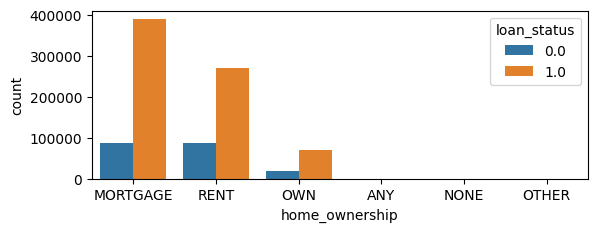

In [66]:
plt.subplot(2, 1, 1)
sns.countplot(x='home_ownership', data=loans, hue='loan_status')

In [67]:
# We now check the percentage of the loan_status column for each category of the home_ownership column

analyse_home_ownership = loans.groupby(['home_ownership','loan_status'])['loan_status'].count()
analyse_home_ownership = analyse_home_ownership.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_home_ownership

home_ownership  home_ownership  loan_status
ANY             ANY             0             21
                                1             79
MORTGAGE        MORTGAGE        0             18
                                1             82
NONE            NONE            0             13
                                1             87
OTHER           OTHER           0             23
                                1             77
OWN             OWN             0             21
                                1             79
RENT            RENT            0             24
                                1             76
Name: loan_status, dtype: float64

In [68]:
# nunique() returns the sum of unique elements in the object
loans['emp_title'].nunique()

274496

In [70]:
emp_title_data = loan['emp_title'].value_counts()[:20]
emp_title_data

emp_title
Teacher               38824
Manager               34298
Owner                 21977
Registered Nurse      15867
Driver                14753
RN                    14737
Supervisor            14297
Sales                 13050
Project Manager       10971
Office Manager         9772
General Manager        9251
Director               8934
owner                  8507
President              7660
Engineer               7304
manager                7060
teacher                6692
Operations Manager     6128
Vice President         5874
Accountant             5596
Name: count, dtype: int64

In [71]:
loan_emp_title = loan.loc[loan['loan_status'] =='Fully Paid'] 
loan_emp_title.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN       3600         3600             3600   36 months   
1  68355089        NaN      24700        24700            24700   36 months   
2  68341763        NaN      20000        20000            20000   60 months   
4  68476807        NaN      10400        10400            10400   60 months   
5  68426831        NaN      11950        11950            11950   36 months   

   int_rate  installment grade sub_grade             emp_title emp_length  \
0        14          123     C        C4               leadman  10+ years   
1        12          820     C        C1              Engineer  10+ years   
2        11          433     B        B4          truck driver  10+ years   
4        22          290     F        F1   Contract Specialist    3 years   
5        13          405     C        C3  Veterinary Tecnician    4 years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0       MORTGAGE       55000        Not Verified  Dec-2015  Fully Paid   
1       MORTGAGE       65000        Not Verified  Dec-2015  Fully Paid   
2       MORTGAGE       63000        Not Verified  Dec-2015  Fully Paid   
4       MORTGAGE      104433     Source Verified  Dec-2015  Fully Paid   
5           RENT       34000     Source Verified  Dec-2015  Fully Paid   

  pymnt_plan  \
0          n   
1          n   
2          n   
4          n   
5          n   

                                                                 url desc  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=68407277  NaN   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=68355089  NaN   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=68341763  NaN   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=68476807  NaN   
5  https://lendingclub.com/browse/loanDetail.action?loan_id=68426831  NaN   

              purpose               title zip_code addr_state  dti  \
0  debt_consolidation  Debt consolidation    190xx         PA    6   
1      small_business            Business    577xx         SD   16   
2    home_improvement                 NaN    605xx         IL   11   
4      major_purchase      Major purchase    174xx         PA   25   
5  debt_consolidation  Debt consolidation    300xx         GA   10   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0            0         Aug-2003             675              679   
1            1         Dec-1999             715              719   
2            0         Aug-2000             695              699   
4            1         Jun-1998             695              699   
5            0         Oct-1987             690              694   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0               1                      30                     NaN         7   
1               4                       6                     NaN        22   
2               0                     NaN                     NaN         6   
4               3                      12                     NaN        12   
5               0                     NaN                     NaN         5   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0        0       2765          30         13                   w          0   
1        0      21470          19         38                   w          0   
2        0       7869          56         18                   w          0   
4        0      21929          64         35                   w          0   
5        0       8822          68          6                   w          0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0              0         4422             4422             3600   
1              0        25680            25680            24700   
2              0        22706            22706            20000   
4              0  

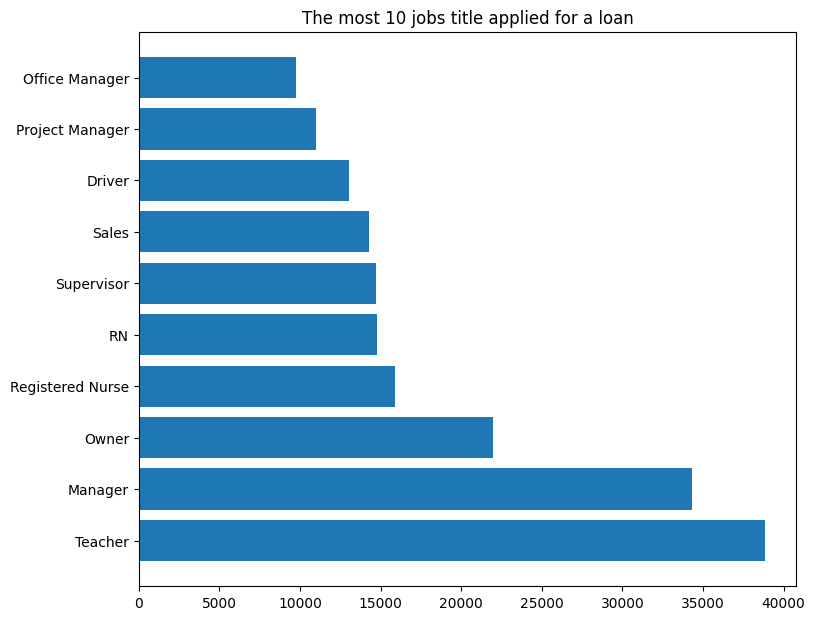

In [72]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
plt.barh(loan_emp_title.emp_title.value_counts()[:10].index, loan.emp_title.value_counts()[:10])
plt.title("The most 10 jobs title applied for a loan")
plt.tight_layout()

In [73]:
#convert annual_inc to integer data type

loans = loans.astype({"home_ownership":'category', "addr_state":'category'})
loans.dtypes

loan_amnt                 float64
term                      float64
sub_grade                 float64
emp_title                  object
emp_length                float64
home_ownership           category
annual_inc                float64
loan_status               float64
addr_state               category
dti                       float64
mths_since_recent_inq     float64
revol_util                float64
num_op_rev_tl             float64
dtype: object

In [74]:

cat_columns = ["home_ownership", "addr_state"]
#create a new DataFrame for our processed data
loans = pd.get_dummies(loans, prefix_sep="__",
                              columns=cat_columns)
loans.head()

loan_amnt  term  sub_grade            emp_title  emp_length  annual_inc  \
0       3600     1         24              leadman          10       55000   
2      20000     2         14         truck driver          10       63000   
4      10400     2         51  Contract Specialist           3      104433   
7      20000     1         11          road driver          10       85000   
8      10000     1          2      SERVICE MANAGER           6       85000   

   loan_status  dti  mths_since_recent_inq  revol_util  num_op_rev_tl  \
0            1    6                      4          30              4   
2            1   11                     10          56              4   
4            1   25                      1          64              7   
7            1   18                      8           6              3   
8            1   13                      1          34             13   

   home_ownership__ANY  home_ownership__MORTGAGE  home_ownership__NONE  \
0                False                      True                 False   
2                False                      True                 False   
4                False                      True                 False   
7                False                      True                 False   
8                False                     False                 False   

   home_ownership__OTHER  home_ownership__OWN  home_ownership__RENT  \
0                  False                False                 False   
2                  False                False                 False   
4                  False                False                 False   
7                  False                False                 False   
8                  False                False                  True   

   addr_state__AK  addr_state__AL  addr_state__AR  addr_state__AZ  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__CA  addr_state__CO  addr_state__CT  addr_state__DC  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__DE  addr_state__FL  addr_state__GA  addr_state__HI  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__ID  addr_state__IL  addr_state__IN  addr_state__KS  \
0           False           False           False           False   
2           False            True           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__KY  addr_state__LA  addr_state__MA  addr_state__MD  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__ME  addr_state__MI  addr_state__MN  addr_state__MO  \
0           False           False           False           False   
2         

In [76]:
# We now check the percentage of the loan_status column for each category of the sub_grade column
analyse_sub_grade = loans.groupby(['sub_grade','loan_status'])['loan_status'].count()
analyse_sub_grade = analyse_sub_grade.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
analyse_sub_grade

sub_grade  sub_grade  loan_status
1          1          0              3
                      1             97
2          2          0              5
                      1             95
3          3          0              5
                      1             95
4          4          0              7
                      1             93
5          5          0              8
                      1             92
11         11         0             10
                      1             90
12         12         0             11
                      1             89
13         13         0             13
                      1             87
14         14         0             15
                      1             85
15         15         0             16
                      1             84
21         21         0             19
                      1             81
22         22         0             21
                      1             79
23         23         0       

<Axes: xlabel='sub_grade'>

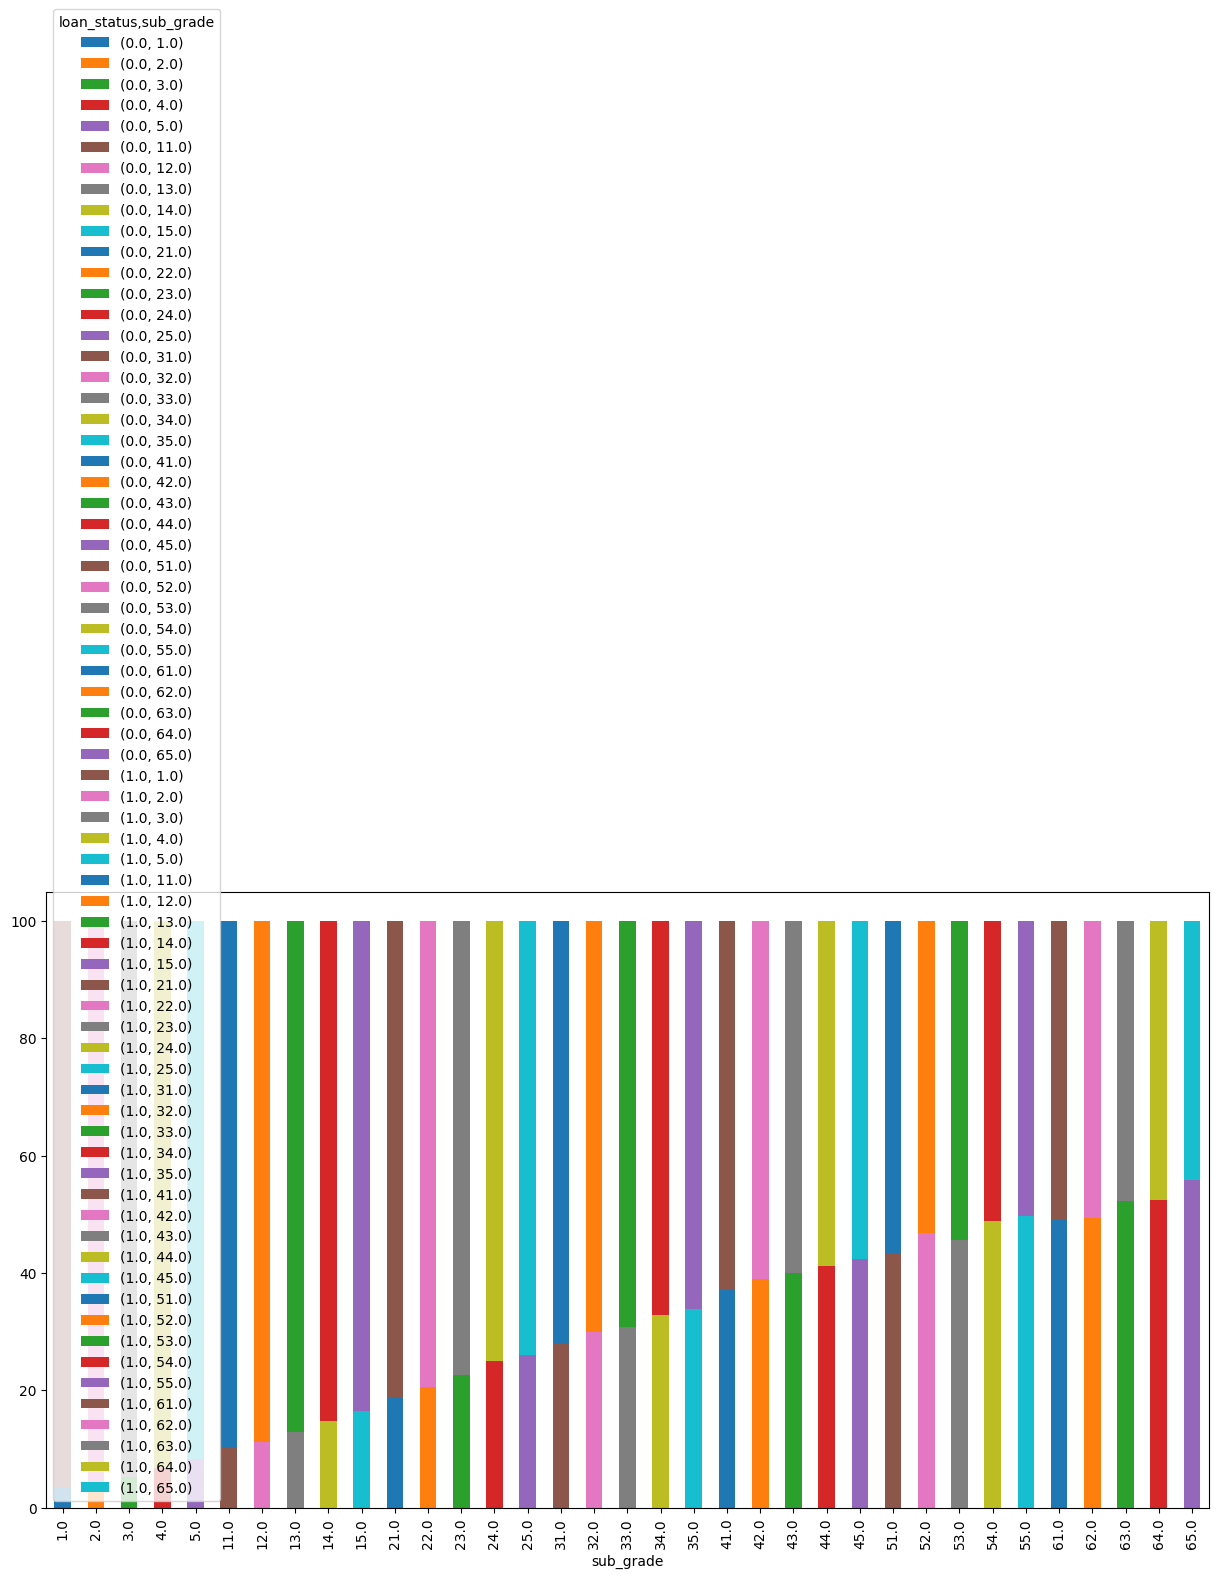

In [78]:
# Now we check the percentage of the loan_status column for each category of the term column
analyse_sub_grade = analyse_sub_grade.unstack()
analyse_sub_grade.plot(kind='bar', stacked=True, figsize=(15, 8))

<Axes: xlabel='sub_grade'>

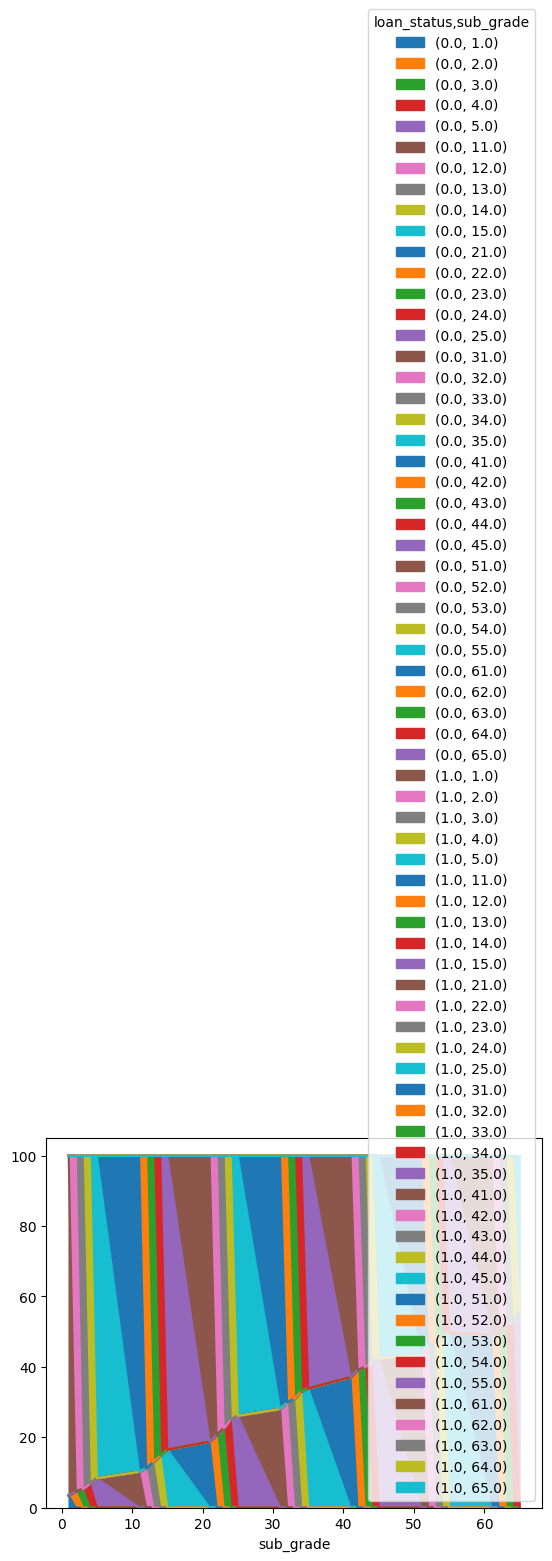

In [79]:
analyse_sub_grade.plot.area()

In [80]:
bins = [30000, 50000, 70000, 90000, 110000, 130000, 150000]
labels = ['30-50k', '50-70k', '70-90k', '90-110k','110-130k','130-150k']
loans['binned'] = pd.cut(loans['annual_inc'], bins=bins, labels=labels)
loans.head()

loan_amnt  term  sub_grade            emp_title  emp_length  annual_inc  \
0       3600     1         24              leadman          10       55000   
2      20000     2         14         truck driver          10       63000   
4      10400     2         51  Contract Specialist           3      104433   
7      20000     1         11          road driver          10       85000   
8      10000     1          2      SERVICE MANAGER           6       85000   

   loan_status  dti  mths_since_recent_inq  revol_util  num_op_rev_tl  \
0            1    6                      4          30              4   
2            1   11                     10          56              4   
4            1   25                      1          64              7   
7            1   18                      8           6              3   
8            1   13                      1          34             13   

   home_ownership__ANY  home_ownership__MORTGAGE  home_ownership__NONE  \
0                False                      True                 False   
2                False                      True                 False   
4                False                      True                 False   
7                False                      True                 False   
8                False                     False                 False   

   home_ownership__OTHER  home_ownership__OWN  home_ownership__RENT  \
0                  False                False                 False   
2                  False                False                 False   
4                  False                False                 False   
7                  False                False                 False   
8                  False                False                  True   

   addr_state__AK  addr_state__AL  addr_state__AR  addr_state__AZ  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__CA  addr_state__CO  addr_state__CT  addr_state__DC  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__DE  addr_state__FL  addr_state__GA  addr_state__HI  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__ID  addr_state__IL  addr_state__IN  addr_state__KS  \
0           False           False           False           False   
2           False            True           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__KY  addr_state__LA  addr_state__MA  addr_state__MD  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__ME  addr_state__MI  addr_state__MN  addr_state__MO  \
0           False           False           False           False   
2         

In [81]:
analyse_income = loans.groupby(['binned','loan_status'])['loan_status'].count()
analyse_income

C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\2309413560.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analyse_income = loans.groupby(['binned','loan_status'])['loan_status'].count()


binned    loan_status
30-50k    0               57715
          1              190550
50-70k    0               57179
          1              207206
70-90k    0               37457
          1              150990
90-110k   0               20307
          1               90828
110-130k  0               10762
          1               50366
130-150k  0                5907
          1               29087
Name: loan_status, dtype: int64

We can see charged off and paid back applicants for each income bin, however, it’s hard to see the trend from one bin to another by just using the observation count. Let’s rather use proportional weight across each bin.

In [82]:
analyse_income = analyse_income.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_income

C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\2758098388.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analyse_income = analyse_income.groupby(level=0).apply(lambda x:


binned    binned    loan_status
30-50k    30-50k    0             23
                    1             77
50-70k    50-70k    0             22
                    1             78
70-90k    70-90k    0             20
                    1             80
90-110k   90-110k   0             18
                    1             82
110-130k  110-130k  0             18
                    1             82
130-150k  130-150k  0             17
                    1             83
Name: loan_status, dtype: float64

In [83]:
analyse_income = analyse_income.unstack()
analyse_income

loan_status        0  1
binned   binned        
30-50k   30-50k   23 77
50-70k   50-70k   22 78
70-90k   70-90k   20 80
90-110k  90-110k  18 82
110-130k 110-130k 18 82
130-150k 130-150k 17 83

<Axes: xlabel='binned,binned'>

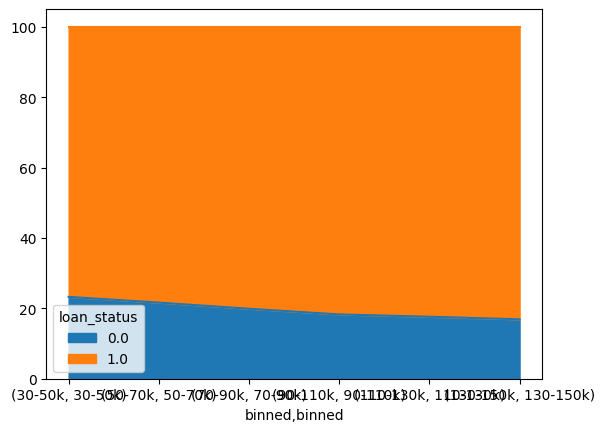

In [84]:
analyse_income.plot.area()

Alright, this is much better, we can see a direct relationship between applicant income and loan status. The lower the income the more likely the applicant is not going to pay it back, in fact, it is almost 1.5 times more likely! These observations can be very helpful for loan officers to understand risks involved depending on applicant segment and attributes. This information could be used by loan officers to create additional business rules to reduce company risks.

# 'emp_length' vs 'loan_status'

One more assumption to validate is: Does employment length affect the likelihoodness of applicant to pay the loan back? We may hypothesise that people in early of their career may not be able to pay loans back due to their early curve difficulties, let’s find out if this is true:

In [85]:
# Now we check the percentage of the loan_status column for each category of the emp_length column

analyse_emp_length = loans.groupby(['emp_length','loan_status'])['loan_status'].count()
analyse_emp_length = analyse_emp_length.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_emp_length

emp_length  emp_length  loan_status
0           0           0             22
                        1             78
1           1           0             22
                        1             78
2           2           0             21
                        1             79
3           3           0             21
                        1             79
4           4           0             21
                        1             79
5           5           0             21
                        1             79
6           6           0             21
                        1             79
7           7           0             21
                        1             79
8           8           0             21
                        1             79
9           9           0             21
                        1             79
10          10          0             20
                        1             80
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length,emp_length'>

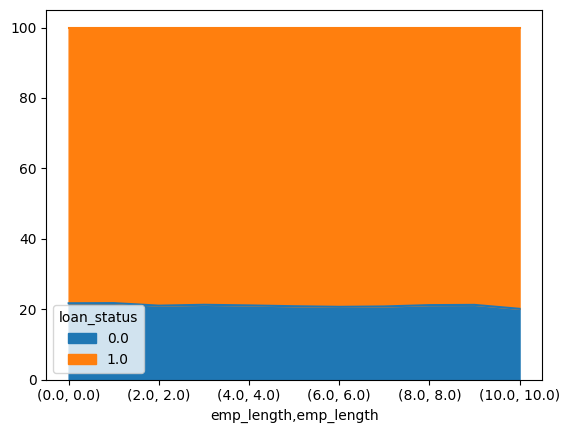

In [86]:
analyse_emp_length = analyse_emp_length.unstack()
analyse_emp_length.plot.area()

Employment length does not seem to affect the loan status outcome much and we can confirm our hypothesis is not true.

# 'dti' vs 'loan_status'

How does existing applicant debt impact loan_status outcome? Are applicants with more debt and less income more likely to charge off?

In [87]:
analyse_dti = loans.groupby(['dti','loan_status'])['loan_status'].count()
loans['dti'].unique()

array([ 5.91, 10.78, 25.37, ..., 44.53, 44.45, 41.76])

In [88]:
binsdti = [1, 10, 20, 30, 40, 50]
labelsdti = ['1-10', '10-20', '20-30','30-40','40-50']
loans['binneddti'] = pd.cut(loans['dti'], bins=binsdti, labels=labelsdti)


analyse_dti = loans.groupby(['binneddti','loan_status'])['loan_status'].count()
analyse_dti = analyse_dti.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_dti

C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\1403256359.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analyse_dti = loans.groupby(['binneddti','loan_status'])['loan_status'].count()
C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\1403256359.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analyse_dti = analyse_dti.groupby(level=0).apply(lambda x:


binneddti  binneddti  loan_status
1-10       1-10       0             16
                      1             84
10-20      10-20      0             18
                      1             82
20-30      20-30      0             24
                      1             76
30-40      30-40      0             30
                      1             70
40-50      40-50      0             31
                      1             69
Name: loan_status, dtype: float64

<Axes: xlabel='binneddti,binneddti'>

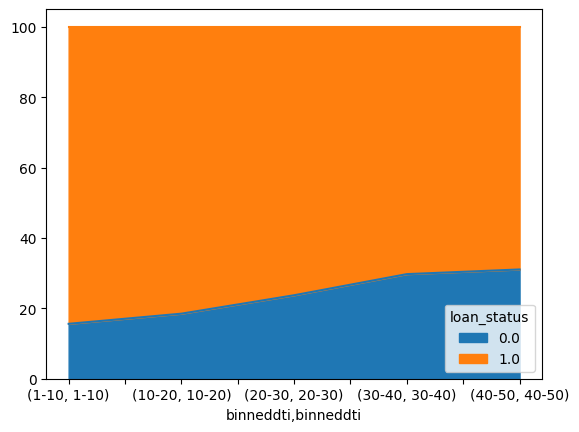

In [89]:
analyse_dti = analyse_dti.unstack()
analyse_dti.plot.area()

# Train/Test Split

In [90]:
loans.drop(["emp_title", "binned","binneddti"], axis = 1, inplace = True)

In short, any model requires a training set to train a model and a test set to evaluate the trained model. This is a typical code to do that:

In [92]:
X = loans.drop('loan_status', axis=1)
y = loans[['loan_status']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Python_3.10.2\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [94]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


[[  3194  44677]
 [  3885 178584]]


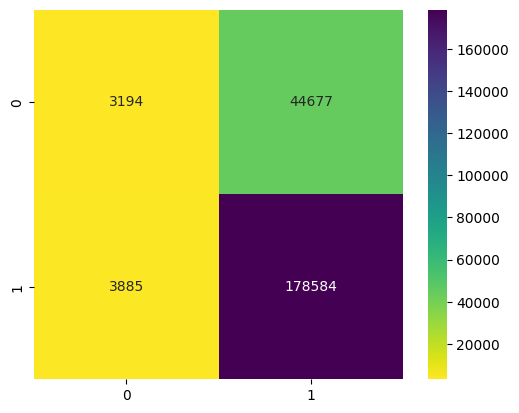

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)

In [103]:
loans.head()

loan_amnt  term  sub_grade  emp_length  annual_inc  loan_status  dti  \
0       3600     1         24          10       55000            1    6   
2      20000     2         14          10       63000            1   11   
4      10400     2         51           3      104433            1   25   
7      20000     1         11          10       85000            1   18   
8      10000     1          2           6       85000            1   13   

   mths_since_recent_inq  revol_util  num_op_rev_tl  home_ownership__ANY  \
0                      4          30              4                False   
2                     10          56              4                False   
4                      1          64              7                False   
7                      8           6              3                False   
8                      1          34             13                False   

   home_ownership__MORTGAGE  home_ownership__NONE  home_ownership__OTHER  \
0                      True                 False                  False   
2                      True                 False                  False   
4                      True                 False                  False   
7                      True                 False                  False   
8                     False                 False                  False   

   home_ownership__OWN  home_ownership__RENT  addr_state__AK  addr_state__AL  \
0                False                 False           False           False   
2                False                 False           False           False   
4                False                 False           False           False   
7                False                 False           False           False   
8                False                  True           False           False   

   addr_state__AR  addr_state__AZ  addr_state__CA  addr_state__CO  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__CT  addr_state__DC  addr_state__DE  addr_state__FL  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__GA  addr_state__HI  addr_state__ID  addr_state__IL  \
0           False           False           False           False   
2           False           False           False            True   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__IN  addr_state__KS  addr_state__KY  addr_state__LA  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__MA  addr_state__MD  addr_state__ME  addr_state__MI  \
0           False           False           False           False   
2           False           False           False           False   
4           False           False           False           False   
7           False           False           False           False   
8           False           False           False           False   

   addr_state__MN  addr_state__MO  addr_state__MS  addr_state__MT  \
0           F

In [105]:
# Replacing the False and True values with 0 and 1 respectively in every column of the dataset
loans = loans.replace({False: 0, True: 1})

C:\Users\Mohammad Soban\AppData\Local\Temp\ipykernel_19416\2250695022.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loans = loans.replace({False: 0, True: 1})


In [107]:
loans.head()

loan_amnt  term  sub_grade  emp_length  annual_inc  loan_status  dti  \
0       3600     1         24          10       55000            1    6   
2      20000     2         14          10       63000            1   11   
4      10400     2         51           3      104433            1   25   
7      20000     1         11          10       85000            1   18   
8      10000     1          2           6       85000            1   13   

   mths_since_recent_inq  revol_util  num_op_rev_tl  home_ownership__ANY  \
0                      4          30              4                    0   
2                     10          56              4                    0   
4                      1          64              7                    0   
7                      8           6              3                    0   
8                      1          34             13                    0   

   home_ownership__MORTGAGE  home_ownership__NONE  home_ownership__OTHER  \
0                         1                     0                      0   
2                         1                     0                      0   
4                         1                     0                      0   
7                         1                     0                      0   
8                         0                     0                      0   

   home_ownership__OWN  home_ownership__RENT  addr_state__AK  addr_state__AL  \
0                    0                     0               0               0   
2                    0                     0               0               0   
4                    0                     0               0               0   
7                    0                     0               0               0   
8                    0                     1               0               0   

   addr_state__AR  addr_state__AZ  addr_state__CA  addr_state__CO  \
0               0               0               0               0   
2               0               0               0               0   
4               0               0               0               0   
7               0               0               0               0   
8               0               0               0               0   

   addr_state__CT  addr_state__DC  addr_state__DE  addr_state__FL  \
0               0               0               0               0   
2               0               0               0               0   
4               0               0               0               0   
7               0               0               0               0   
8               0               0               0               0   

   addr_state__GA  addr_state__HI  addr_state__ID  addr_state__IL  \
0               0               0               0               0   
2               0               0               0               1   
4               0               0               0               0   
7               0               0               0               0   
8               0               0               0               0   

   addr_state__IN  addr_state__KS  addr_state__KY  addr_state__LA  \
0               0               0               0               0   
2               0               0               0               0   
4               0               0               0               0   
7               0               0               0               0   
8               0               0               0               0   

   addr_state__MA  addr_state__MD  addr_state__ME  addr_state__MI  \
0               0               0               0               0   
2               0               0               0               0   
4               0               0               0               0   
7               0               0               0               0   
8               0               0               0               0   

   addr_state__MN  addr_state__MO  addr_state__MS  addr_state__MT  \
0            

loan_status
1    729875
0    191482
Name: count, dtype: int64


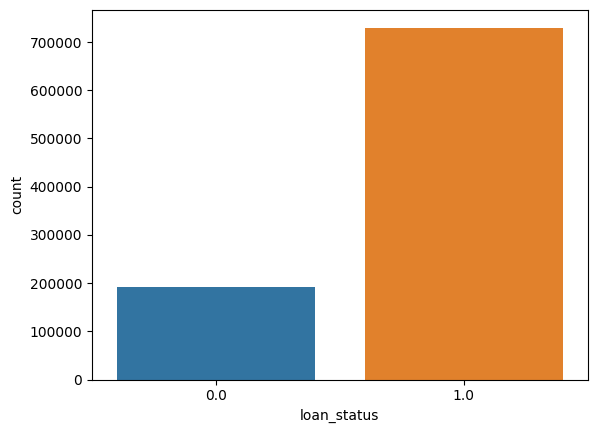

In [108]:
print(loans.loan_status.value_counts())
sns.countplot(x='loan_status', data=loans)
plt.show()

In [109]:
X = loans.drop('loan_status', axis=1)
y = loans[['loan_status']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)

In [112]:
Logistics = LogisticRegression()
Logistics.fit(X_train, y_train)

y_pred = Logistics.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

c:\Python_3.10.2\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.79


In [113]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred)
logistic_confusion_matrix

array([[  3194,  44677],
       [  3885, 178584]], dtype=int64)

<Axes: >

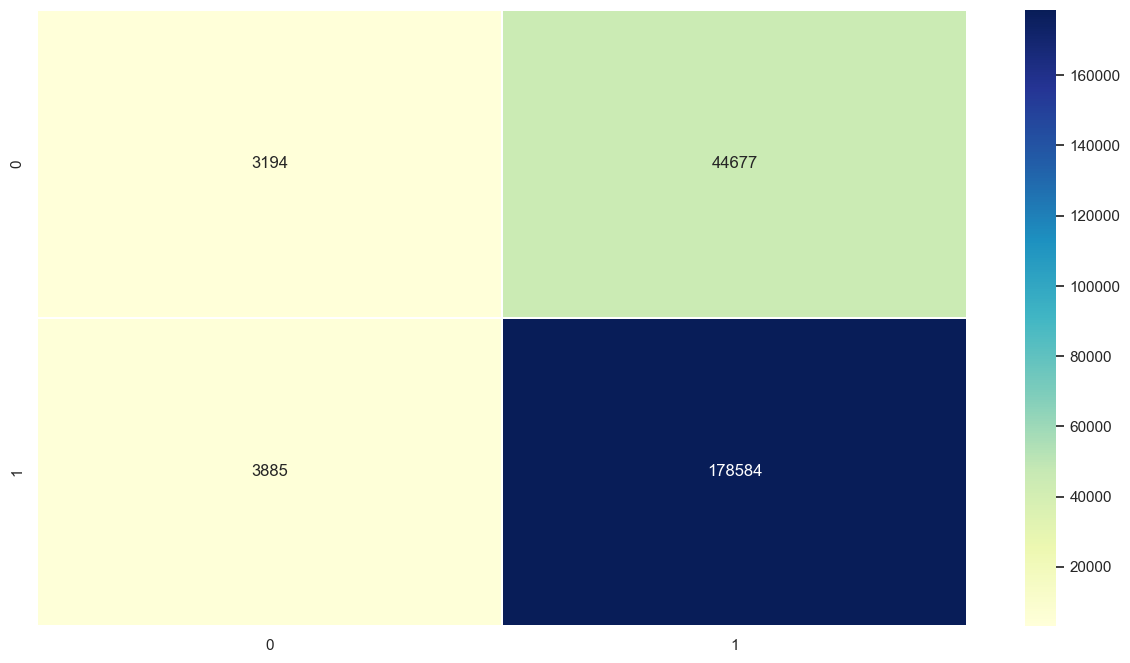

In [114]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(logistic_confusion_matrix, annot=True, cmap='YlGnBu', linewidths=.29,fmt='d')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

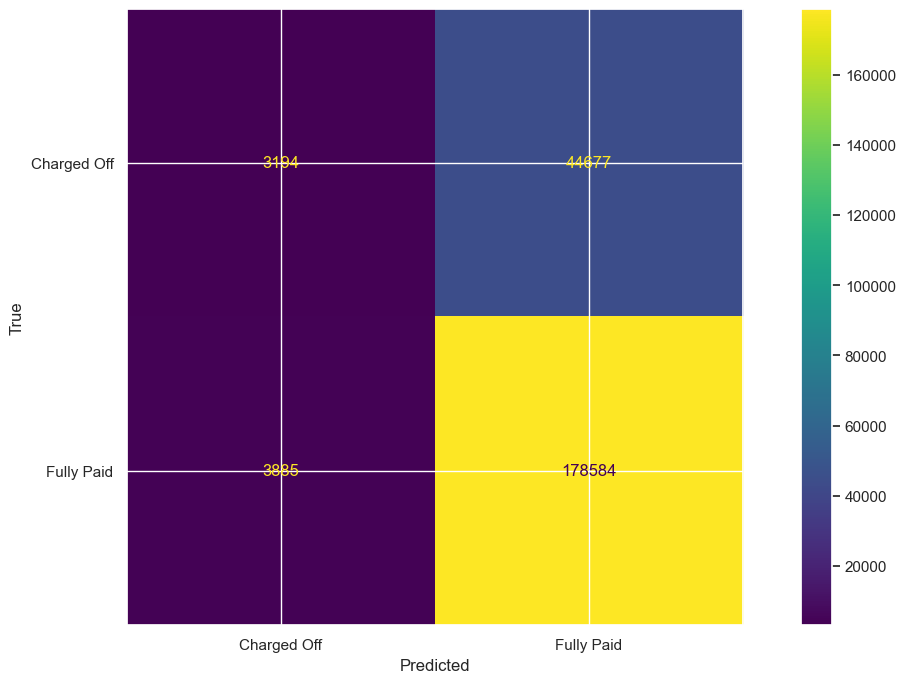

In [118]:
cm = confusion_matrix(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Charged Off','Fully Paid'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [119]:
# The ROC score determines the accuracy of the model

# Logistic Regression's ROC-AUC score
logistic_roc = roc_auc_score(y_test, y_pred)
logistic_roc

0.5227148457316688

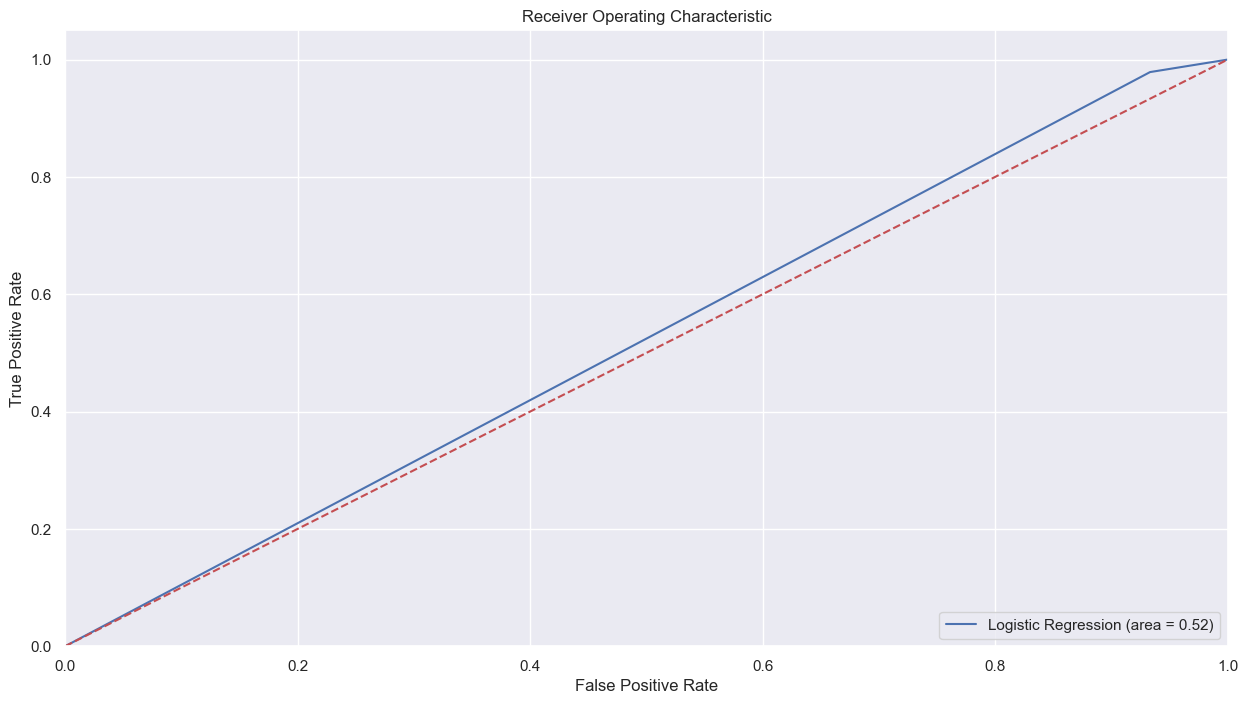

In [120]:
# Plotting the roc curve for the logistic regression model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc)  # fpr is the false positive rate and tpr is the true positive rate
plt.plot([0, 1], [0, 1],'r--') # r-- is the color red and -- is the line style
plt.xlim([0.0, 1.0]) # x limits is used to set the limits of the x-axis  
plt.ylim([0.0, 1.05]) # y limits is used to set the limits of the y-axis

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig("Log_ROC")
plt.show()

In [127]:
# Accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Precision score
pre_score = precision_score(y_test, y_pred)

# Recall score
rec_score = recall_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

print("Accuracy Score :- ", acc_score , " \nPrecision Score :- ", pre_score, "\nRecall Score :- ", rec_score)

Accuracy Score :-  0.7891725275679431  
Precision Score :-  0.79988891924698 
Recall Score :-  0.978708712164806


In [128]:
# The below line of code gives probability of the target variable being 0 or 1 for the test set
# and [:, 1] is used to get the probability of the target variable being 1
y_proba = Logistics.predict_proba(X_test)[:,1]

# Which means y_proba is an array of probabilities of the target variable being 1 for each observation in the test set

In [129]:
# Precision score and recall score
prec_score = precision_score(y_test, y_proba > 0.50)
rec_score = recall_score(y_test, y_proba > 0.50)

print("Precision score :- ", prec_score, "\nRecall score :- ", rec_score)

Precision score :-  0.79988891924698 
Recall score :-  0.978708712164806
